<a href="https://colab.research.google.com/github/pazvera/portafolio-/blob/main/Sm17_Examen_finalfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen - Montserrat Vera

## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


In [237]:
%pip install wbgapi

In [238]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/examen ciencia dd')

import my_func as fn


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [241]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [242]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [243]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [244]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [245]:
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

**Etapa 1**

Análisis Descriptivo e Imputación de Datos

In [246]:
df_wb_raw.head()

country             Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
0     ZWE            Zimbabwe     85266779554.54              49.84   
1     ZMB              Zambia     76129157926.52              46.17   
3     PSE  West Bank and Gaza     27694396392.60                NaN   
5     VNM            Viet Nam   1359364235987.88              48.62   
7     VUT             Vanuatu      1030019594.14              46.13   

   SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
0      6232464.00         1.68  16340822.00         8559888.00   
1      7147630.00         2.79  20723965.00        10467717.00   
3             NaN         2.39   5165775.00         2598445.00   
5     56799003.00         0.67 100352192.00        51201223.00   
7       115453.00         2.32    320409.00          158611.00   

   SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  \
0              52.38         7780934.00              47.62   9920197.00   
1              50.51        10256248.00              49.49  11392257.00   
3              50.30         2567330.00              49.70    678902.00   
5              51.02        49150969.00              48.98  62088011.00   
7              49.50          161798.00              50.50    249069.00   

   SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  SP.URB.GROW  SP.URB.TOTL  \
0            0.72           60.71         3.18   6420625.00   
1            2.02           54.97         3.75   9331708.00   
3            0.42           13.14         2.69   4486873.00   
5           -0.26           61.87         2.21  38264181.00   
7            2.31           77.73         2.37     71340.00   

   SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  GC.TAX.EXPT.CN  GC.TAX.EXPT.ZS  \
0              39.29             NaN             NaN             NaN   
1              45.03           10.88             NaN             NaN   
3              86.86            5.87             NaN             NaN   
5              38.13            3.25             NaN             NaN   
7              22.27           11.18      1978365.00            0.01   

   NE.EXP.GNFS.KD.ZG      NE.EXP.GNFS.KN  NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD  \
0              -8.22      11564084400.00           17.12   4123414226.15   
1                NaN                 NaN           40.85    615021617.34   
3              -6.02       2728500000.00           17.75   1018000000.00   
5              -1.22 5428320692635100.00           86.47  51462771462.63   
7                NaN                 NaN             NaN             NaN   

       NV.AGR.TOTL.CN  NV.IND.MANF.CD  SL.UEM.TOTL.FE.NE.ZS  \
0       7765791300.00   5480609201.23                  9.46   
1      12430828000.00   2344942276.42                  6.04   
3       1018000000.00   1772200000.00                   NaN   
5 1224161370000000.00 104905366269.49                  1.51   
7                 NaN             NaN                   NaN   

   SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.NE.ZS  SL.UEM.TOTL.MA.ZS  \
0               8.82                  9.13               8.69   
1               6.21                  5.71               5.65   
3                NaN                   NaN                NaN   
5               1.51                  1.77               1.77   
7               6.37                   NaN               3.98   

   SL.UEM.TOTL.NE.ZS  SL.UEM.TOTL.ZS  BM.KLT.DINV.CD.WD  BX.KLT.DINV.WD.GD.ZS  \
0               9.29            8.76        30500000.00                  1.68   
1               5.86            5.91       153215005.57                  2.32   
3                NaN             NaN         3159064.92                  0.58   
5               1.65            1.65     -1550000000.00                  4.26   
7                NaN            5.08         4399200.00                  0.83   

   EG.ELC.LOSS.ZS  GC.DOD.TOTL.CN  GC.DOD.TOTL.GD.ZS  GE.EST  \
0             NaN             NaN                NaN   -1.17   
1             NaN             NaN                NaN   -0.66   
3        

In [247]:
df_wb_raw.tail()

country                         Country  NY.GDP.MKTP.PP.KD  \
261     CEB  Central Europe and the Baltics   4218703618000.86   
262     CSS          Caribbean small states    133857662978.72   
263     ARB                      Arab World   8097599963644.49   
264     AFW      Africa Western and Central   2992691790513.14   
265     AFE     Africa Eastern and Southern   3065001503618.01   

     SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  \
261              45.67     49100893.00         0.11 100183707.00   
262              43.97      1919128.00         0.50   4519904.00   
263              19.14    132483437.00         2.26 482105978.00   
264              46.36    212022202.00         2.39 509398589.00   
265              47.28    288476515.00         2.52 750491370.00   

     SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
261        51639515.00              51.54        48544192.00   
262         2293907.00              50.75         2225997.00   
263       232702770.00              48.27       249403208.00   
264       252899429.00              49.65       256499160.00   
265       379019549.00              50.50       371471821.00   

     SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  \
261              48.46  38373288.00           -0.16           38.30   
262              49.25   2255337.00            0.56           49.90   
263              51.73 194915735.00            1.67           40.43   
264              50.35 243070193.00            1.13           47.72   
265              49.50 467013510.00            1.86           62.23   

     SP.URB.GROW  SP.URB.TOTL  SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  \
261         0.28  61810419.00              61.70            9.44   
262         0.44   2264567.00              50.10            4.48   
263         2.65 287190243.00              59.57            4.00   
264         3.54 266328396.00              52.28            5.22   
265         3.62 283477860.00              37.77            7.40   

     GC.TAX.EXPT.CN  GC.TAX.EXPT.ZS  NE.EXP.GNFS.KD.ZG  NE.EXP.GNFS.KN  \
261             NaN             NaN               3.02             NaN   
262             NaN             NaN                NaN             NaN   
263             NaN             NaN               4.76             NaN   
264             NaN             NaN                NaN             NaN   
265             NaN             NaN               3.48             NaN   

     NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD  NV.AGR.TOTL.CN  NV.IND.MANF.CD  \
261           62.73  60986788585.87             NaN 375093904414.89   
262             NaN   2791055473.38             NaN   5774837929.55   
263           46.80 180001714437.44             NaN 440669246251.97   
264             NaN 226611671765.23             NaN  98136312332.50   
265           26.15 180831982833.64             NaN 118456523004.24   

     SL.UEM.TOTL.FE.NE.ZS  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.NE.ZS  \
261                  4.00               4.00                  4.02   
262                   NaN               8.85                   NaN   
263                   NaN              17.16                   NaN   
264                   NaN               3.97                   NaN   
265                   NaN               8.60                   NaN   

     SL.UEM.TOTL.MA.ZS  SL.UEM.TOTL.NE.ZS  SL.UEM.TOTL.ZS  BM.KLT.DINV.CD.WD  \
261               4.03               4.01            4.01    -41692101751.93   
262               7.02                NaN            7.82       769160046.87   
263               7.79                NaN            9.58     53708632373.46   
264               2.68                NaN            3.28       878988485.61   
265               7.09                NaN            7.81     -1757809778.21   

     BX.KLT.DINV.WD.GD.ZS  EG.ELC.LOSS.ZS  GC.DOD.TOTL.CN  GC.DOD.TOTL.GD.ZS  \
261                  0.32            5.93             NaN                NaN   
262                 -1.63             NaN  

Limpieza de datos y analisis exploratorio

In [248]:
import wbgapi as wb
import pandas as pd

In [249]:
table = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [250]:
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)


In [251]:
df_wb_raw.tail()

country      Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
193     AGO       Angola    322967768020.03              49.45   
194     AND      Andorra      5225828100.98                NaN   
195     DZA      Algeria    699818363984.64              16.83   
196     ALB      Albania     49443120128.36              44.99   
197     AFG  Afghanistan     82238478027.94               6.85   

     SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
193     15430003.00         3.08  36749906.00        18568216.00   
194             NaN         1.43     80856.00           39502.00   
195     13174228.00         1.50  46164219.00        22614984.00   
196      1210263.00        -1.54   2414095.00         1220548.00   
197      8866507.00         2.14  41454761.00        20530683.00   

     SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  \
193              50.53        18181690.00              49.47  11079544.00   
194              48.85           41354.00              51.15      9040.00   
195              48.99        23549235.00              51.01  11664402.00   
196              50.56         1193547.00              49.44   1008836.00   
197              49.53        20924078.00              50.47  30894968.00   

     SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  SP.URB.GROW  SP.URB.TOTL  \
193            0.46           30.15         4.23  25670362.00   
194            0.86           11.18         1.51     71816.00   
195           -0.67           25.27         2.24  34499817.00   
196           -2.37           41.79        -0.95   1405259.00   
197            2.03           74.53         2.45  10559793.00   

     SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  GC.TAX.EXPT.CN  GC.TAX.EXPT.ZS  \
193              69.85           13.64  13717784170.00            0.20   
194              88.82             NaN             NaN             NaN   
195              74.73            9.32             NaN             NaN   
196              58.21            4.76             NaN             NaN   
197              25.47           -4.64             NaN             NaN   

     NE.EXP.GNFS.KD.ZG   NE.EXP.GNFS.KN  NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD  \
193             -26.26 1554100254316.88           32.33  22172752173.04   
194                NaN              NaN             NaN     18111240.86   
195               3.10 1401219426562.60           23.79  33145552003.06   
196               8.55  721333797700.00           38.42   3823020945.90   
197             -12.11  179712000000.00           16.85   5959243270.70   

       NV.AGR.TOTL.CN  NV.IND.MANF.CD  SL.UEM.TOTL.FE.NE.ZS  \
193 16204708455581.10   7847840369.21                   NaN   
194       16750000.00    128595216.47                   NaN   
195  4502589000000.00  22611113674.94                   NaN   
196   384767943100.00   1692088577.67                 10.96   
197   469350000000.00   1293435754.19                   NaN   

     SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.NE.ZS  SL.UEM.TOTL.MA.ZS  \
193              14.67                   NaN              14.40   
194                NaN                   NaN                NaN   
195              21.14                   NaN               9.79   
196              10.38                 10.42               9.89   
197              26.57                   NaN              13.07   

     SL.UEM.TOTL.NE.ZS  SL.UEM.TOTL.ZS  BM.KLT.DINV.CD.WD  \
193                NaN           14.54        33356158.95   
194                NaN             NaN       221594006.64   
195                NaN           11.70       165582953.21   
196              10.67           10.11       262776733.05   
197                NaN           13.99               0.00   

     BX.KLT.DINV.WD.GD.ZS  EG.ELC.LOSS.ZS  GC.DOD.TOTL.CN  GC.DOD.TOTL.GD.ZS  \
193                 -1.98             NaN             NaN                NaN   
194                  7.29             NaN             NaN                NaN   
195                  0.49            9.20             NaN  

In [252]:
df_wb_raw.head()

country             Country  NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  \
0     ZWE            Zimbabwe     85266779554.54              49.84   
1     ZMB              Zambia     76129157926.52              46.17   
2     PSE  West Bank and Gaza     27694396392.60                NaN   
3     VNM            Viet Nam   1359364235987.88              48.62   
4     VUT             Vanuatu      1030019594.14              46.13   

   SL.TLF.TOTL.IN  SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
0      6232464.00         1.68  16340822.00         8559888.00   
1      7147630.00         2.79  20723965.00        10467717.00   
2             NaN         2.39   5165775.00         2598445.00   
3     56799003.00         0.67 100352192.00        51201223.00   
4       115453.00         2.32    320409.00          158611.00   

   SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  \
0              52.38         7780934.00              47.62   9920197.00   
1              50.51        10256248.00              49.49  11392257.00   
2              50.30         2567330.00              49.70    678902.00   
3              51.02        49150969.00              48.98  62088011.00   
4              49.50          161798.00              50.50    249069.00   

   SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  SP.URB.GROW  SP.URB.TOTL  \
0            0.72           60.71         3.18   6420625.00   
1            2.02           54.97         3.75   9331708.00   
2            0.42           13.14         2.69   4486873.00   
3           -0.26           61.87         2.21  38264181.00   
4            2.31           77.73         2.37     71340.00   

   SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  GC.TAX.EXPT.CN  GC.TAX.EXPT.ZS  \
0              39.29             NaN             NaN             NaN   
1              45.03           10.88             NaN             NaN   
2              86.86            5.87             NaN             NaN   
3              38.13            3.25             NaN             NaN   
4              22.27           11.18      1978365.00            0.01   

   NE.EXP.GNFS.KD.ZG      NE.EXP.GNFS.KN  NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD  \
0              -8.22      11564084400.00           17.12   4123414226.15   
1                NaN                 NaN           40.85    615021617.34   
2              -6.02       2728500000.00           17.75   1018000000.00   
3              -1.22 5428320692635100.00           86.47  51462771462.63   
4                NaN                 NaN             NaN             NaN   

       NV.AGR.TOTL.CN  NV.IND.MANF.CD  SL.UEM.TOTL.FE.NE.ZS  \
0       7765791300.00   5480609201.23                  9.46   
1      12430828000.00   2344942276.42                  6.04   
2       1018000000.00   1772200000.00                   NaN   
3 1224161370000000.00 104905366269.49                  1.51   
4                 NaN             NaN                   NaN   

   SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.NE.ZS  SL.UEM.TOTL.MA.ZS  \
0               8.82                  9.13               8.69   
1               6.21                  5.71               5.65   
2                NaN                   NaN                NaN   
3               1.51                  1.77               1.77   
4               6.37                   NaN               3.98   

   SL.UEM.TOTL.NE.ZS  SL.UEM.TOTL.ZS  BM.KLT.DINV.CD.WD  BX.KLT.DINV.WD.GD.ZS  \
0               9.29            8.76        30500000.00                  1.68   
1               5.86            5.91       153215005.57                  2.32   
2                NaN             NaN         3159064.92                  0.58   
3               1.65            1.65     -1550000000.00                  4.26   
4                NaN            5.08         4399200.00                  0.83   

   EG.ELC.LOSS.ZS  GC.DOD.TOTL.CN  GC.DOD.TOTL.GD.ZS  GE.EST  \
0             NaN             NaN                NaN   -1.17   
1             NaN             NaN                NaN   -0.66   
2        

In [253]:
df_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

<Axes: >

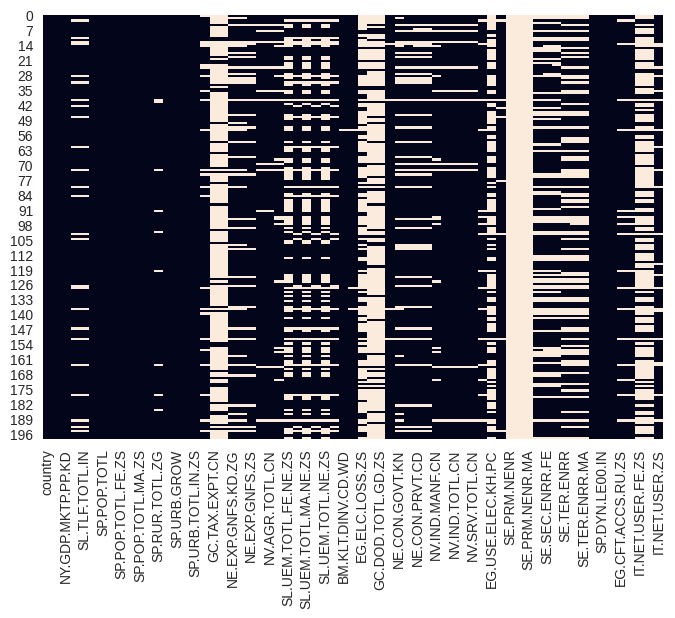

In [254]:
import seaborn as sns
sns.heatmap(df_wb_raw.isnull(), cbar=False)

Interpretacion:
El heatmap evidencial la presencia de datos faltantes e varias variables. Para tratarlos aplicaremos lo siguiente: Siuna variable presenta mas de 15% de valores faltantes, se elimina el analisis. Y si es contrario (≤15%) se imputan los valores faltantes para conservar la variable.

Criterio de limpieza: regla del 15% de valores faltantes

In [255]:
mask_bool = df_wb_raw.isna().mean()>0.15
drop_colums = list(df_wb_raw.isna().mean()[mask_bool].index)


In [256]:


df_wb_limpio = df_wb_raw.drop(columns=drop_colums)

In [257]:
df_wb_raw.isna().mean()

country             0.00
Country             0.00
NY.GDP.MKTP.PP.KD   0.00
SL.TLF.TOTL.FE.ZS   0.13
SL.TLF.TOTL.IN      0.13
                    ... 
EG.CFT.ACCS.RU.ZS   0.08
EG.CFT.ACCS.UR.ZS   0.08
IT.NET.USER.FE.ZS   0.71
IT.NET.USER.MA.ZS   0.71
IT.NET.USER.ZS      0.11
Length: 67, dtype: float64

In [258]:
# Confirmamos la cantidad de datos
print(f"El dataframe contiene {df_wb_limpio.shape[0]} filas y {df_wb_limpio.shape[1]} columnas, donde {len(df_wb_limpio.isna().sum()[df_wb_limpio.isna().mean()>0].index)} contiene datos nulos bajo el 15%")

El dataframe contiene 198 filas y 41 columnas, donde 24 contiene datos nulos bajo el 15%


In [259]:
# Verificamos
df_wb_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

In [260]:
df_wb_limpio.index = df_wb_limpio['Country']
df_wb_limpio = df_wb_limpio.drop(columns = ["country","Country"])

In [261]:
df_wb_limpio.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  \
Country                                                                    
Zimbabwe               85266779554.54              49.84      6232464.00   
Zambia                 76129157926.52              46.17      7147630.00   
West Bank and Gaza     27694396392.60                NaN             NaN   
Viet Nam             1359364235987.88              48.62     56799003.00   
Vanuatu                 1030019594.14              46.13       115453.00   

                    SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
Country                                                           
Zimbabwe                   1.68  16340822.00         8559888.00   
Zambia                     2.79  20723965.00        10467717.00   
West Bank and Gaza         2.39   5165775.00         2598445.00   
Viet Nam                   0.67 100352192.00        51201223.00   
Vanuatu                    2.32    320409.00          158611.00   

                    SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  \
Country                                                                       
Zimbabwe                        52.38         7780934.00              47.62   
Zambia                          50.51        10256248.00              49.49   
West Bank and Gaza              50.30         2567330.00              49.70   
Viet Nam                        51.02        49150969.00              48.98   
Vanuatu                         49.50          161798.00              50.50   

                    SP.RUR.TOTL  SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  SP.URB.GROW  \
Country                                                                        
Zimbabwe             9920197.00            0.72           60.71         3.18   
Zambia              11392257.00            2.02           54.97         3.75   
West Bank and Gaza    678902.00            0.42           13.14         2.69   
Viet Nam            62088011.00           -0.26           61.87         2.21   
Vanuatu               249069.00            2.31           77.73         2.37   

                    SP.URB.TOTL  SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  \
Country                                                              
Zimbabwe             6420625.00              39.29             NaN   
Zambia               9331708.00              45.03           10.88   
West Bank and Gaza   4486873.00              86.86            5.87   
Viet Nam            38264181.00              38.13            3.25   
Vanuatu                71340.00              22.27           11.18   

                    NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD      NV.AGR.TOTL.CN  \
Country                                                                  
Zimbabwe                     17.12   4123414226.15       7765791300.00   
Zambia                       40.85    615021617.34      12430828000.00   
West Bank and Gaza           17.75   1018000000.00       1018000000.00   
Viet Nam                     86.47  51462771462.63 1224161370000000.00   
Vanuatu                        NaN             NaN                 NaN   

                    NV.IND.MANF.CD  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
Country                                                                    
Zimbabwe             5480609201.23               8.82               8.69   
Zambia               2344942276.42               6.21               5.65   
West Bank and Gaza   1772200000.00                NaN                NaN   
Viet Nam           104905366269.49               1.51               1.77   
Vanuatu                        NaN               6.37               3.98   

                    SL.UEM.TOTL.ZS  BM.KLT.DINV.CD.WD  BX.KLT.DINV.WD.GD.ZS  \
Country                                                                       
Zimbabwe                      8.76        30500000.00                  1.68   
Zambia                        5.91       153215005.57                  2.32   
West Bank and Gaza             NaN         

**Etapa 2**

Datos por media

In [262]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_wb_media = pd.DataFrame(imputer.fit_transform(df_wb_limpio), columns=df_wb_limpio.columns, index=df_wb_limpio.index)

In [263]:
df_wb_media.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  \
Country                                                                    
Zimbabwe               85266779554.54              49.84      6232464.00   
Zambia                 76129157926.52              46.17      7147630.00   
West Bank and Gaza     27694396392.60              41.90     20760294.54   
Viet Nam             1359364235987.88              48.62     56799003.00   
Vanuatu                 1030019594.14              46.13       115453.00   

                    SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  \
Country                                                           
Zimbabwe                   1.68  16340822.00         8559888.00   
Zambia                     2.79  20723965.00        10467717.00   
West Bank and Gaza         2.39   5165775.00         2598445.00   
Viet Nam                   0.67 100352192.00        51201223.00   
Vanuatu                    2.32    320409.00          158611.00   

                    SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  \
Country                                                                       
Zimbabwe                        52.38         7780934.00              47.62   
Zambia                          50.51        10256248.00              49.49   
West Bank and Gaza              50.30         2567330.00              49.70   
Viet Nam                        51.02        49150969.00              48.98   
Vanuatu                         49.50          161798.00              50.50   

                    SP.RUR.TOTL  SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  SP.URB.GROW  \
Country                                                                        
Zimbabwe             9920197.00            0.72           60.71         3.18   
Zambia              11392257.00            2.02           54.97         3.75   
West Bank and Gaza    678902.00            0.42           13.14         2.69   
Viet Nam            62088011.00           -0.26           61.87         2.21   
Vanuatu               249069.00            2.31           77.73         2.37   

                    SP.URB.TOTL  SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  \
Country                                                              
Zimbabwe             6420625.00              39.29           10.33   
Zambia               9331708.00              45.03           10.88   
West Bank and Gaza   4486873.00              86.86            5.87   
Viet Nam            38264181.00              38.13            3.25   
Vanuatu                71340.00              22.27           11.18   

                    NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD      NV.AGR.TOTL.CN  \
Country                                                                  
Zimbabwe                     17.12   4123414226.15       7765791300.00   
Zambia                       40.85    615021617.34      12430828000.00   
West Bank and Gaza           17.75   1018000000.00       1018000000.00   
Viet Nam                     86.47  51462771462.63 1224161370000000.00   
Vanuatu                      45.52  21456590396.09  119346870745200.59   

                    NV.IND.MANF.CD  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
Country                                                                    
Zimbabwe             5480609201.23               8.82               8.69   
Zambia               2344942276.42               6.21               5.65   
West Bank and Gaza   1772200000.00               8.02               6.28   
Viet Nam           104905366269.49               1.51               1.77   
Vanuatu             73920371708.01               6.37               3.98   

                    SL.UEM.TOTL.ZS  BM.KLT.DINV.CD.WD  BX.KLT.DINV.WD.GD.ZS  \
Country                                                                       
Zimbabwe                      8.76        30500000.00                  1.68   
Zambia                        5.91       153215005.57                  2.32   
West Bank and Gaza            6.79         

Random Forest

In [264]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np


In [265]:
df_randomf = df_wb_limpio.copy()

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=42),
    max_iter=10,
    random_state=42)

df_randomf = pd.DataFrame(imputer.fit_transform(df_randomf), columns=df_randomf.columns)
df_randomf.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
0     85266779554.54              49.84      6232464.00         1.68   
1     76129157926.52              46.17      7147630.00         2.79   
2     27694396392.60              44.41      2583153.70         2.39   
3   1359364235987.88              48.62     56799003.00         0.67   
4      1030019594.14              46.13       115453.00         2.32   

   SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
0  16340822.00         8559888.00              52.38         7780934.00   
1  20723965.00        10467717.00              50.51        10256248.00   
2   5165775.00         2598445.00              50.30         2567330.00   
3 100352192.00        51201223.00              51.02        49150969.00   
4    320409.00          158611.00              49.50          161798.00   

   SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  \
0              47.62   9920197.00            0.72           60.71   
1              49.49  11392257.00            2.02           54.97   
2              49.70    678902.00            0.42           13.14   
3              48.98  62088011.00           -0.26           61.87   
4              50.50    249069.00            2.31           77.73   

   SP.URB.GROW  SP.URB.TOTL  SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  \
0         3.18   6420625.00              39.29            7.74   
1         3.75   9331708.00              45.03           10.88   
2         2.69   4486873.00              86.86            5.87   
3         2.21  38264181.00              38.13            3.25   
4         2.37     71340.00              22.27           11.18   

   NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD      NV.AGR.TOTL.CN  NV.IND.MANF.CD  \
0           17.12   4123414226.15       7765791300.00   5480609201.23   
1           40.85    615021617.34      12430828000.00   2344942276.42   
2           17.75   1018000000.00       1018000000.00   1772200000.00   
3           86.47  51462771462.63 1224161370000000.00 104905366269.49   
4           28.44    685393520.41   64689581172028.25    369829880.66   

   SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  SL.UEM.TOTL.ZS  BM.KLT.DINV.CD.WD  \
0               8.82               8.69            8.76        30500000.00   
1               6.21               5.65            5.91       153215005.57   
2               8.53               6.68            7.69         3159064.92   
3               1.51               1.77            1.65     -1550000000.00   
4               6.37               3.98            5.08         4399200.00   

   BX.KLT.DINV.WD.GD.ZS  GE.EST      NV.IND.MANF.CN  NV.IND.TOTL.CD  \
0                  1.68   -1.17      10321851000.00  11929358312.16   
1                  2.32   -0.66      47396015500.00   9682007754.00   
2                  0.58   -1.21       1772200000.00   2780800000.00   
3                  4.26    0.13 2495417429783400.00 163050527164.10   
4                  0.83   -0.57   31401822562899.72    365282158.07   

       NV.IND.TOTL.CN  NV.SRV.TOTL.CD      NV.SRV.TOTL.CN  EG.CFT.ACCS.ZS  \
0      22467038700.00  17779293109.69      33484455400.00           30.70   
1     195692915000.00  15668902511.37     316700139600.00            9.20   
2       2780800000.00  10447200000.00      10447200000.00           50.63   
3 3878534930000000.00 183496756795.33 4364895920000000.00           98.70   
4   83817634697962.91    885917787.14  134600585256903.00           20.60   

   EN.GHG.CO2.IP.MT.CE.AR5  SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  \
0                     0.96              65.01           62.77   
1                     1.29              68.67           66.35   
2                     0.64              71.50           65.17   
3                    50.19              79.26           74.59   
4                     0.00              73.93           71.48   

   SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
0              60.23               7.50  

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

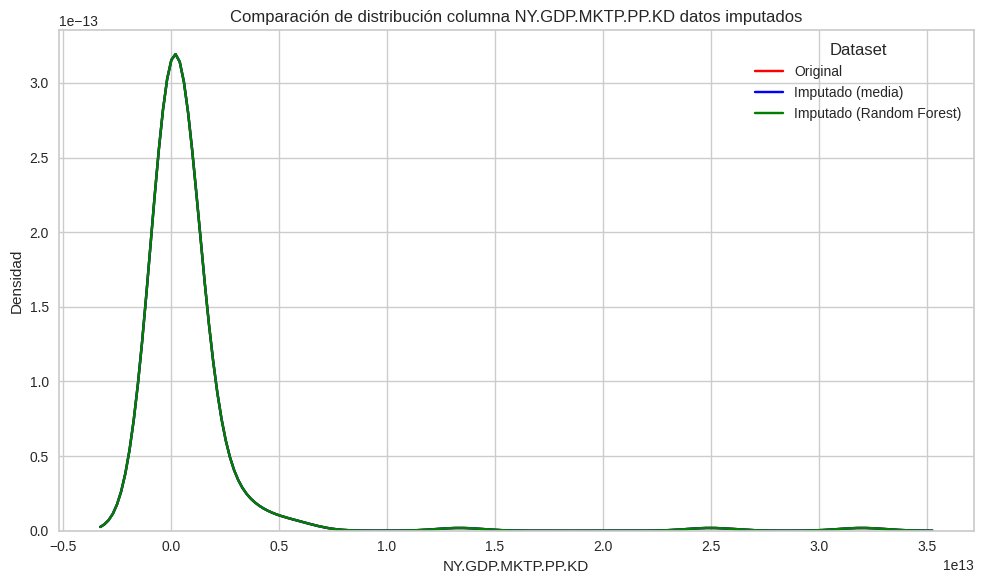

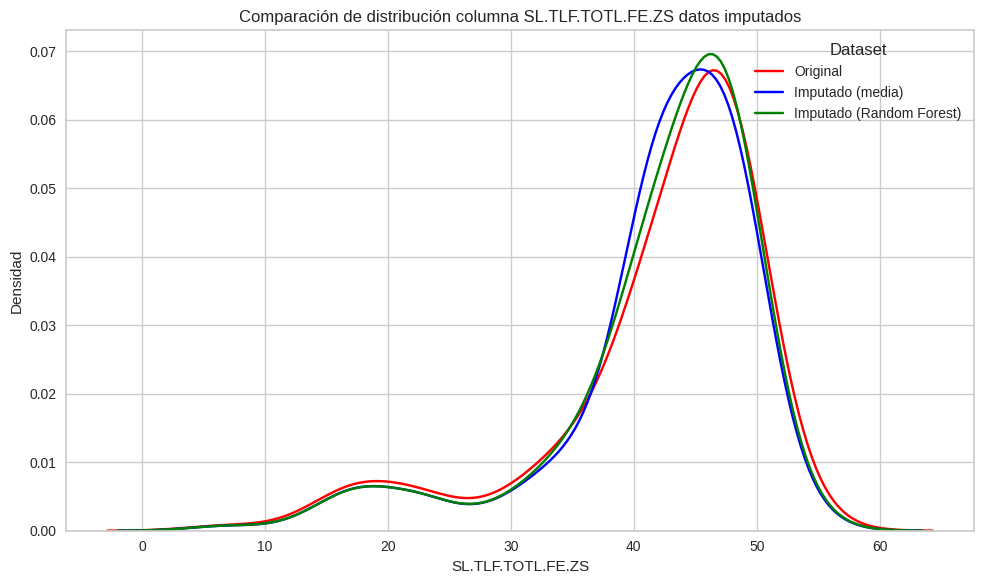

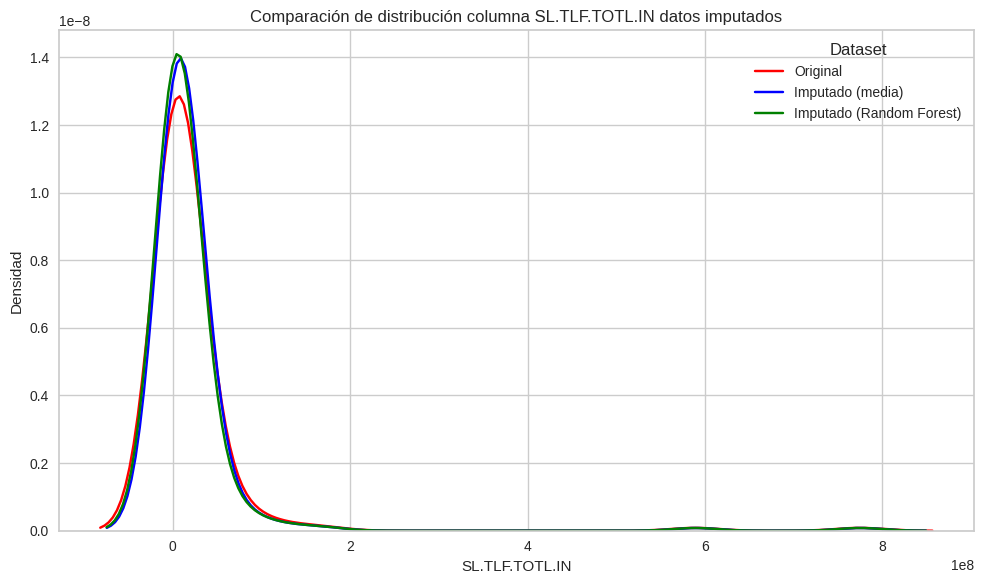

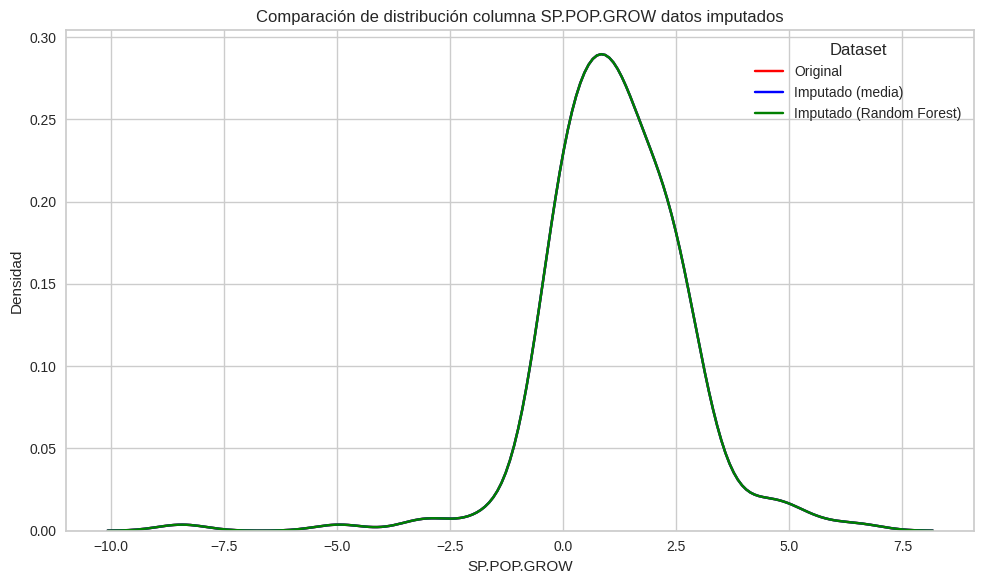

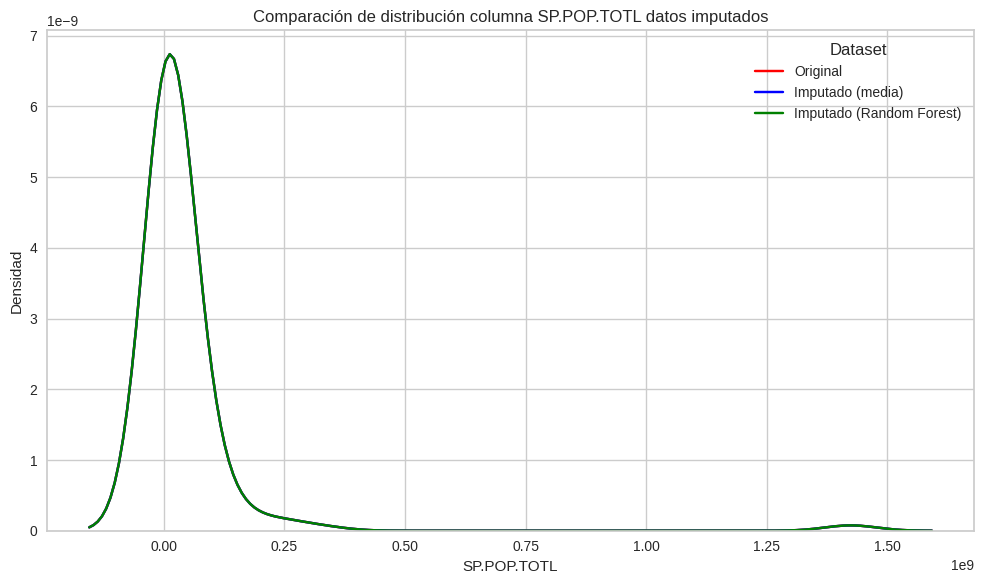

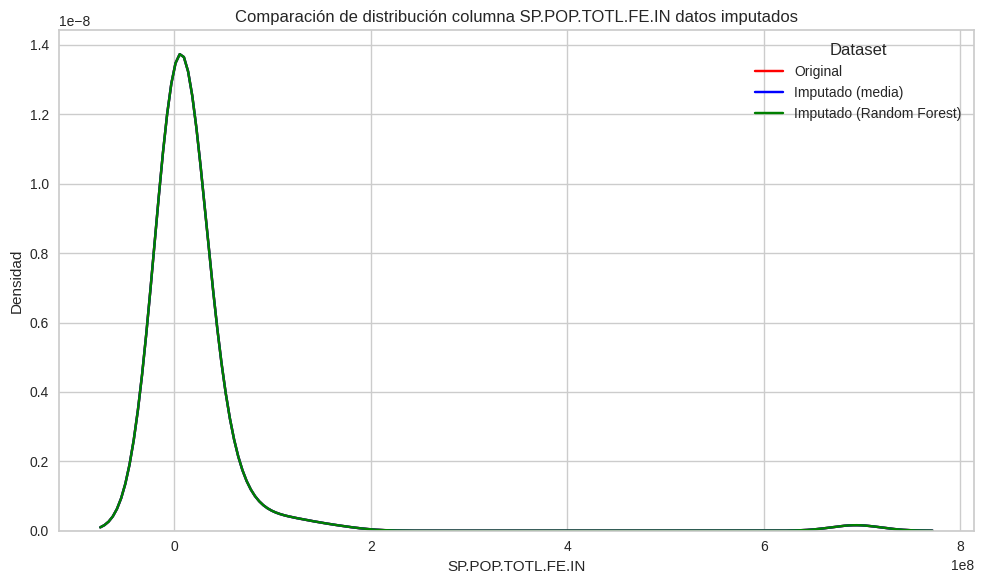

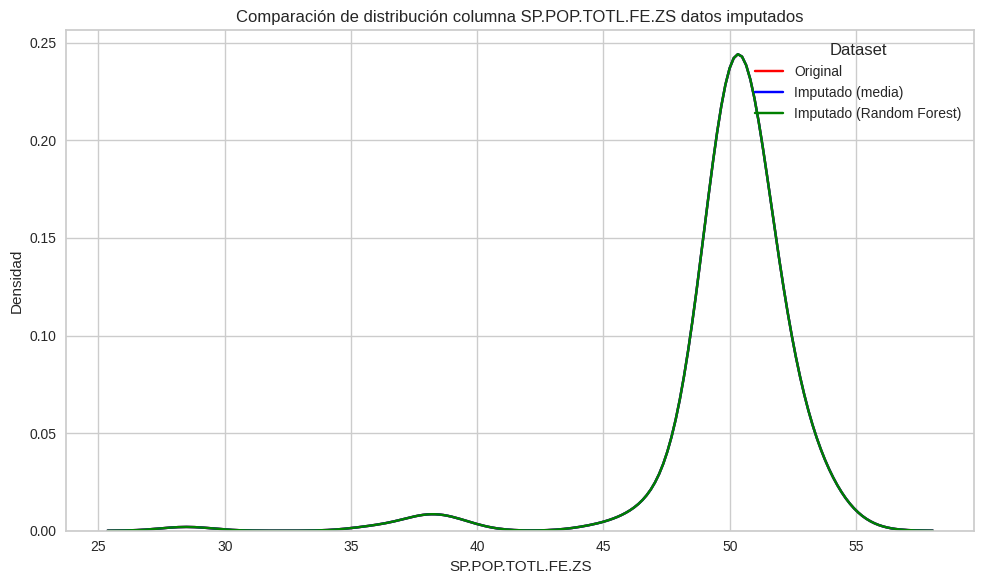

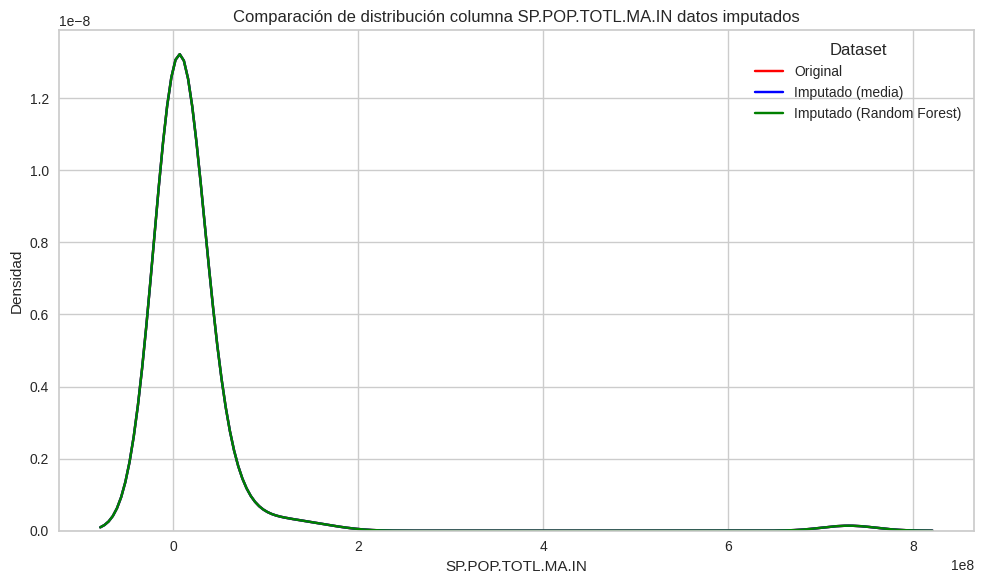

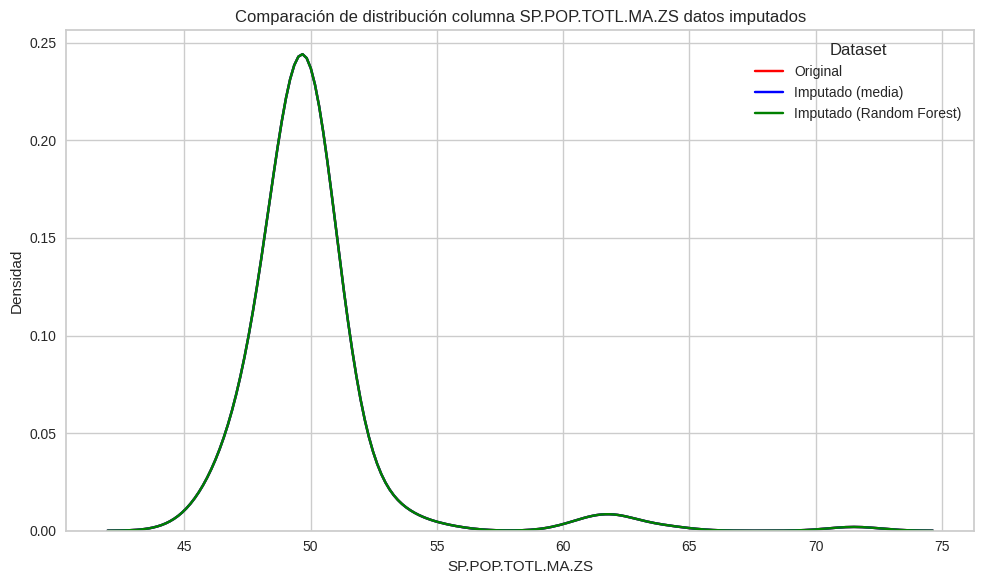

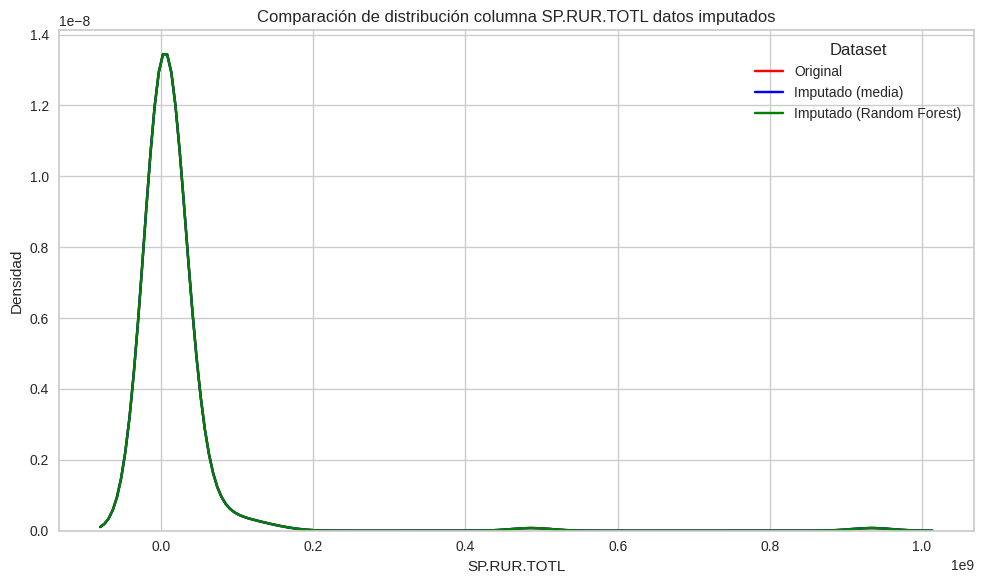

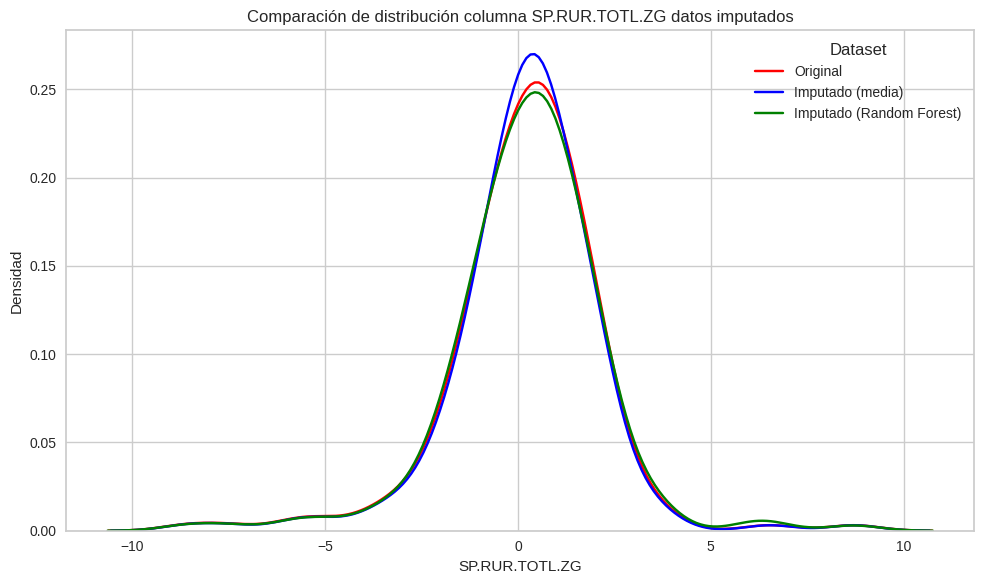

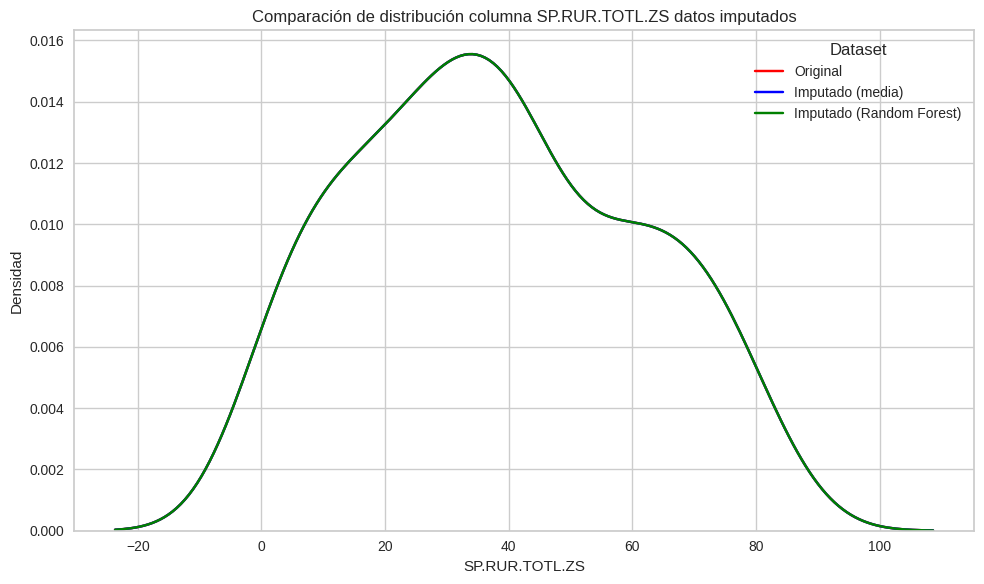

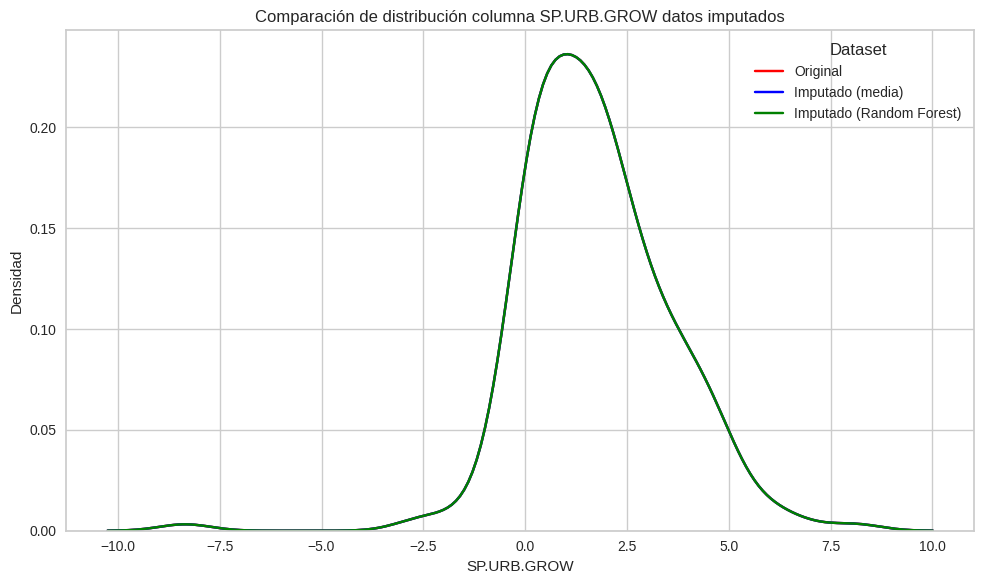

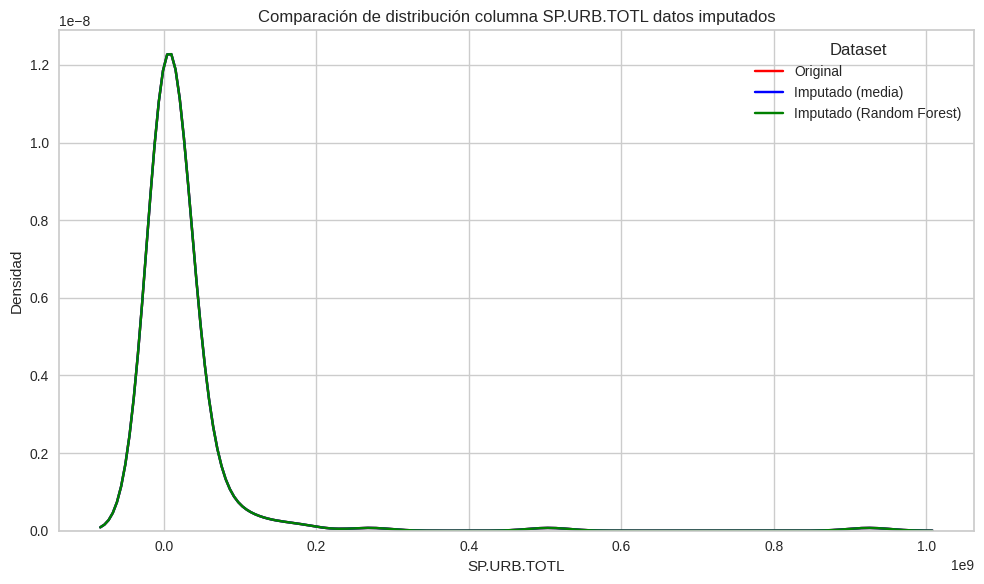

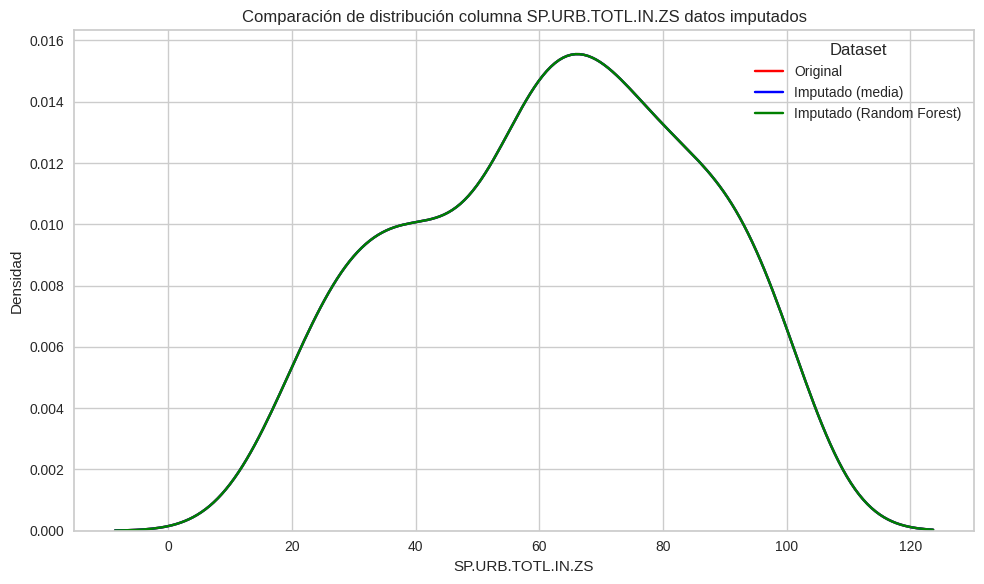

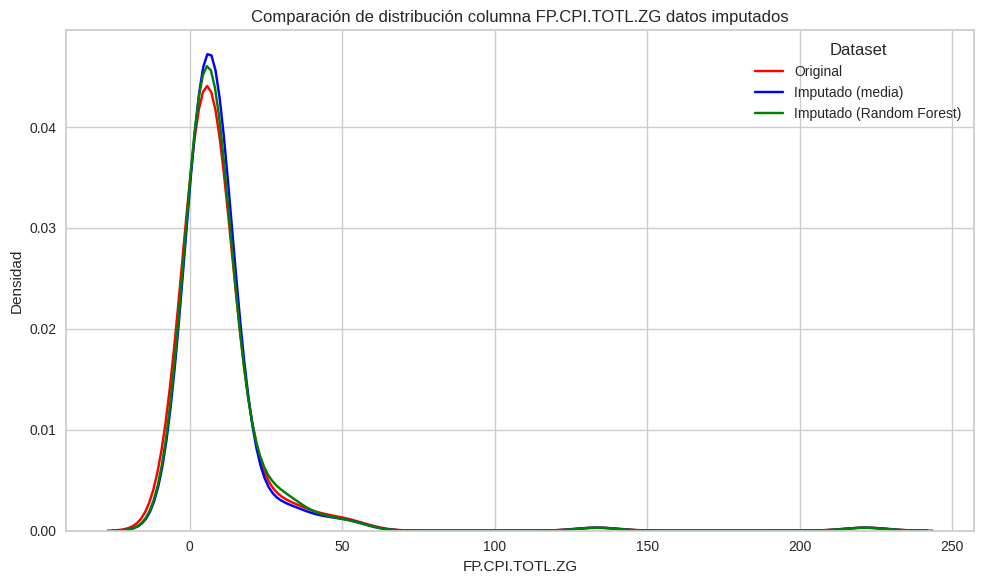

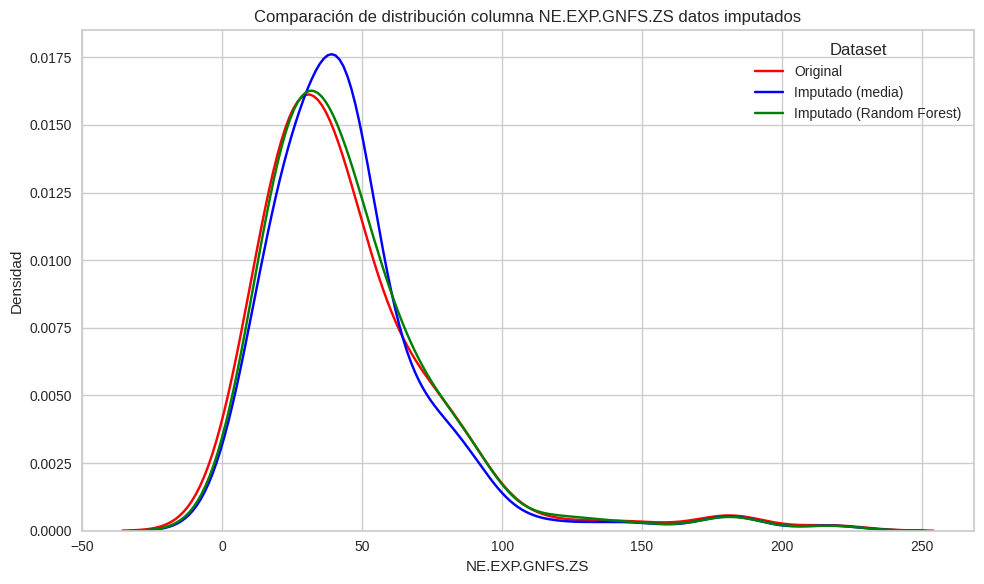

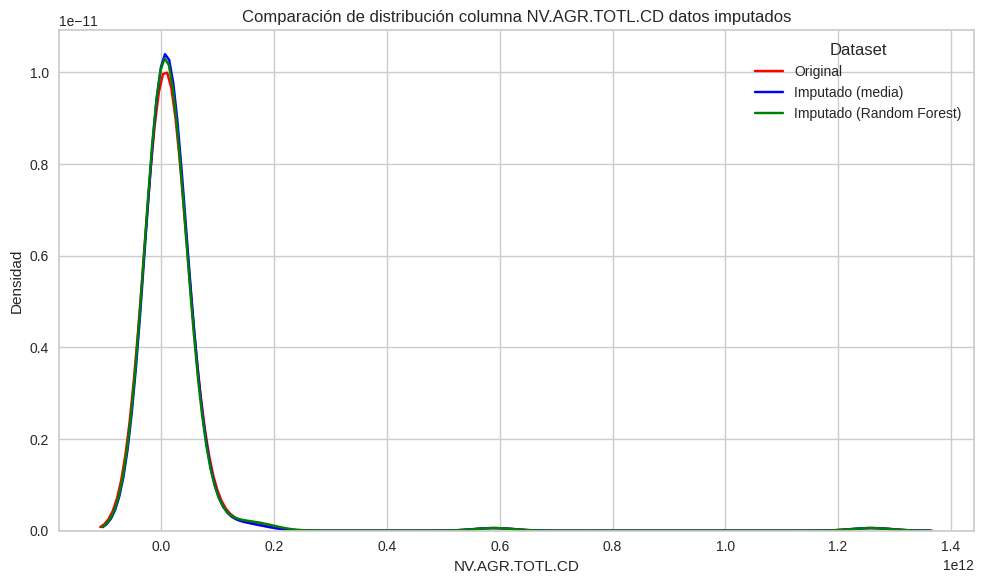

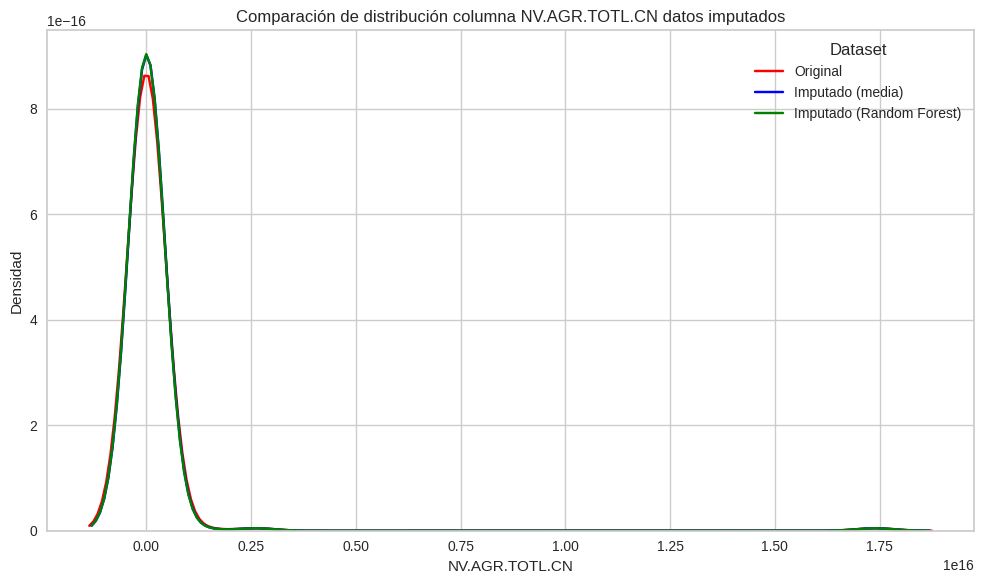

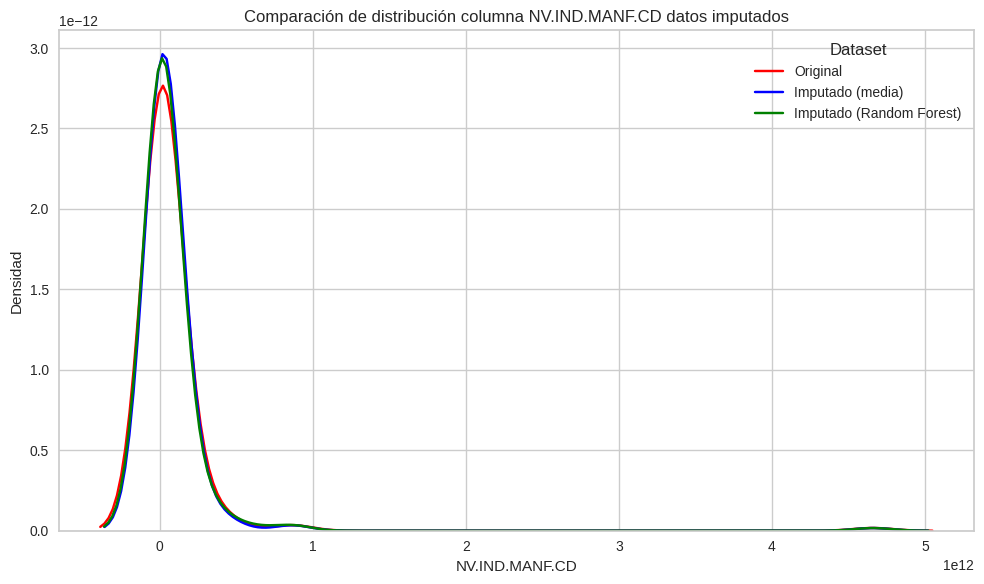

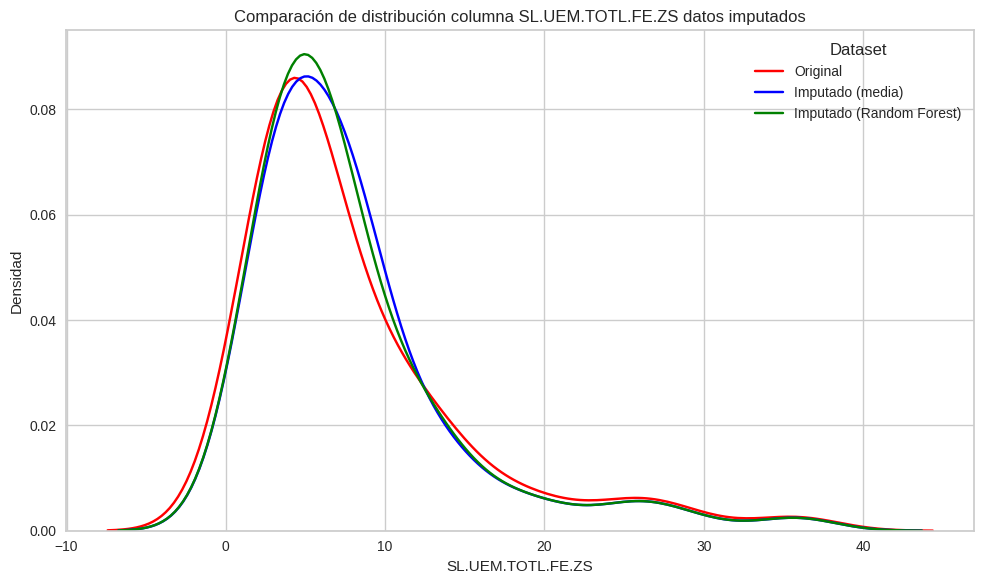

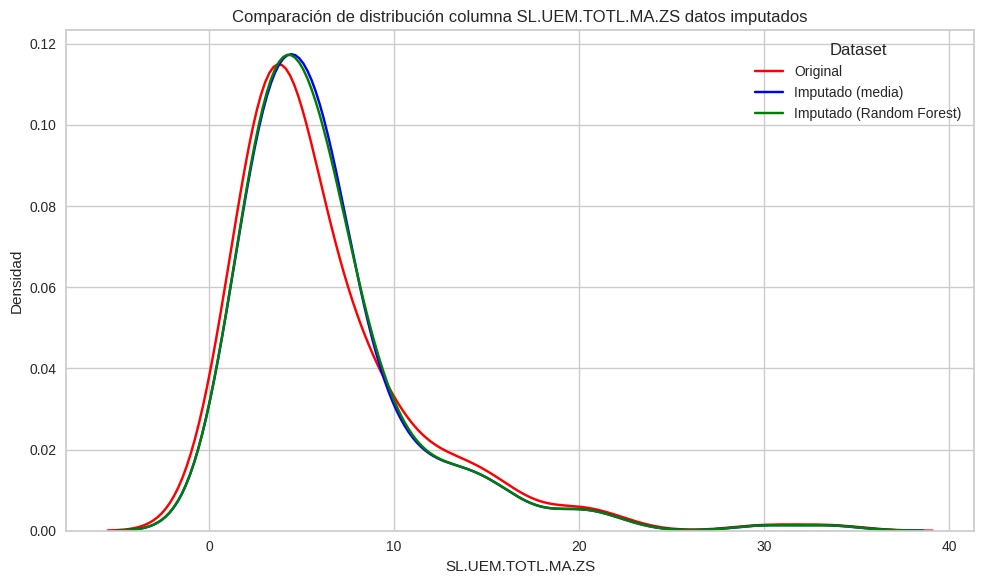

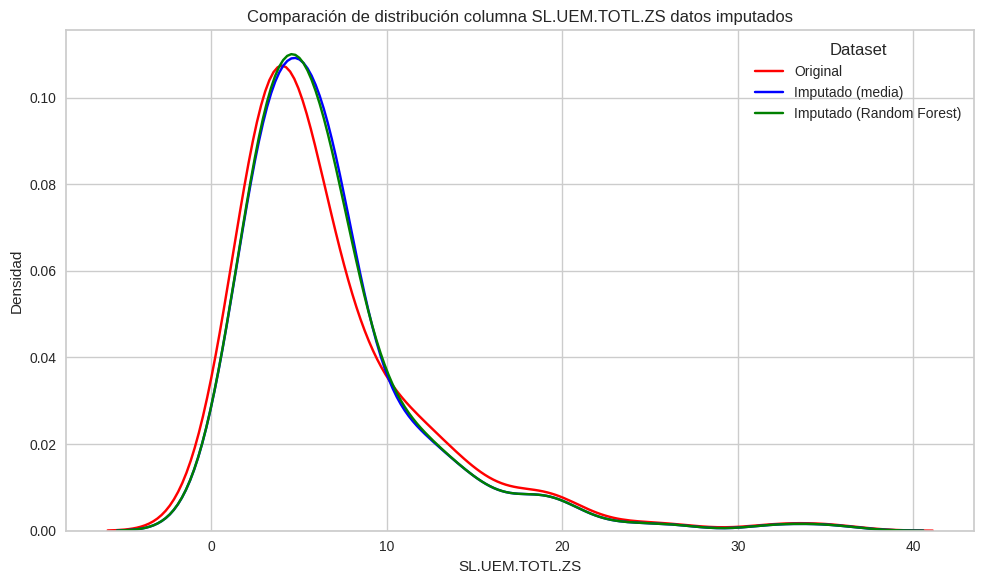

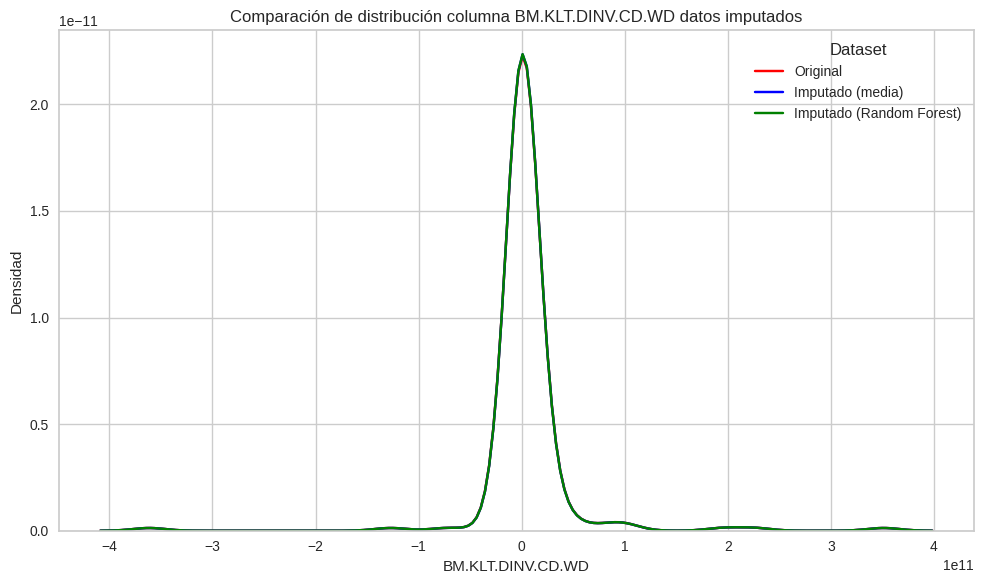

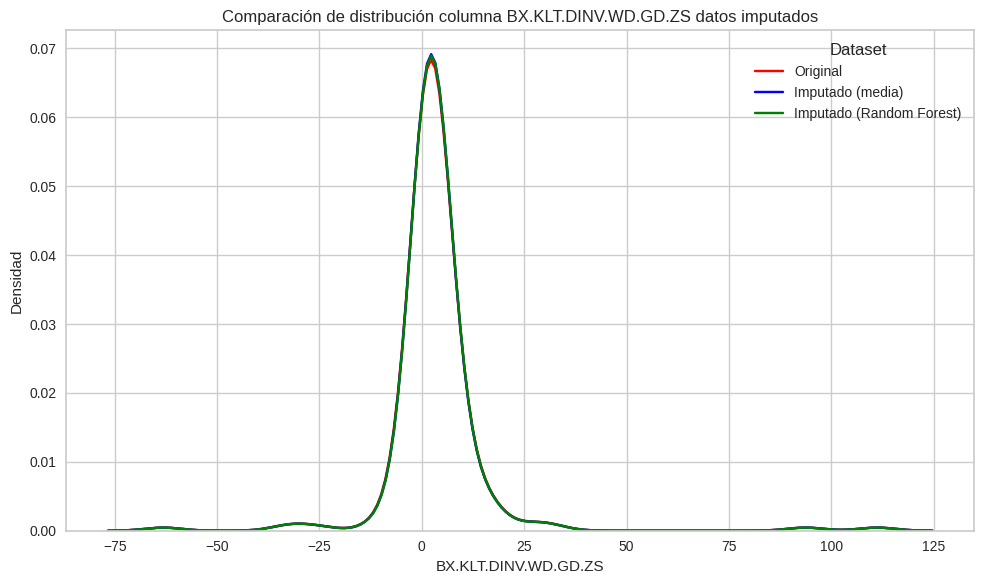

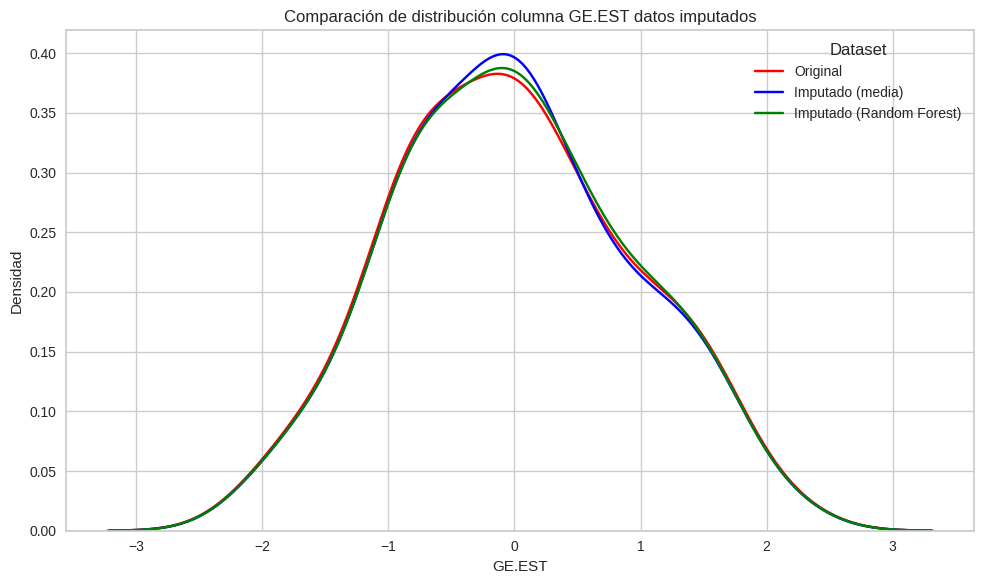

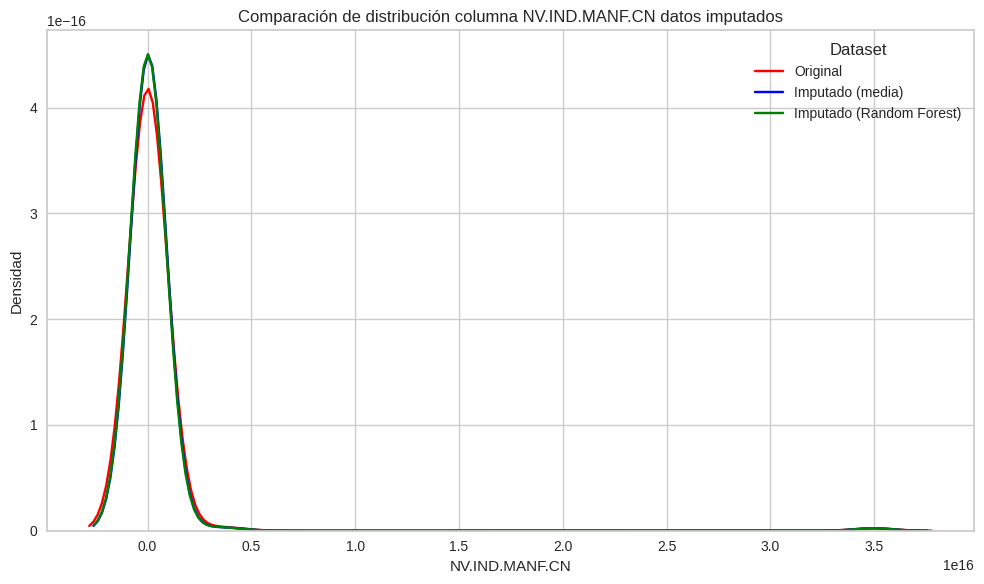

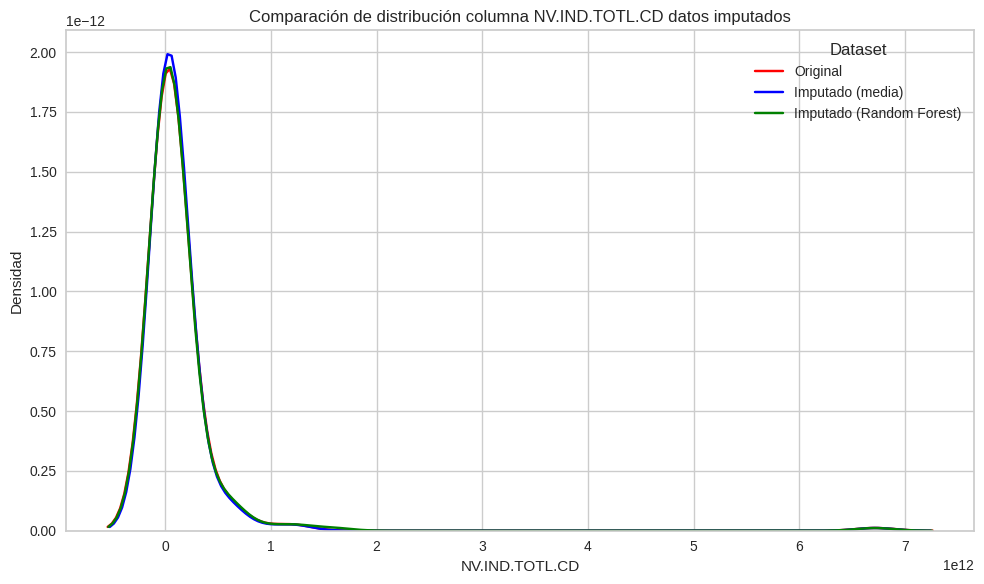

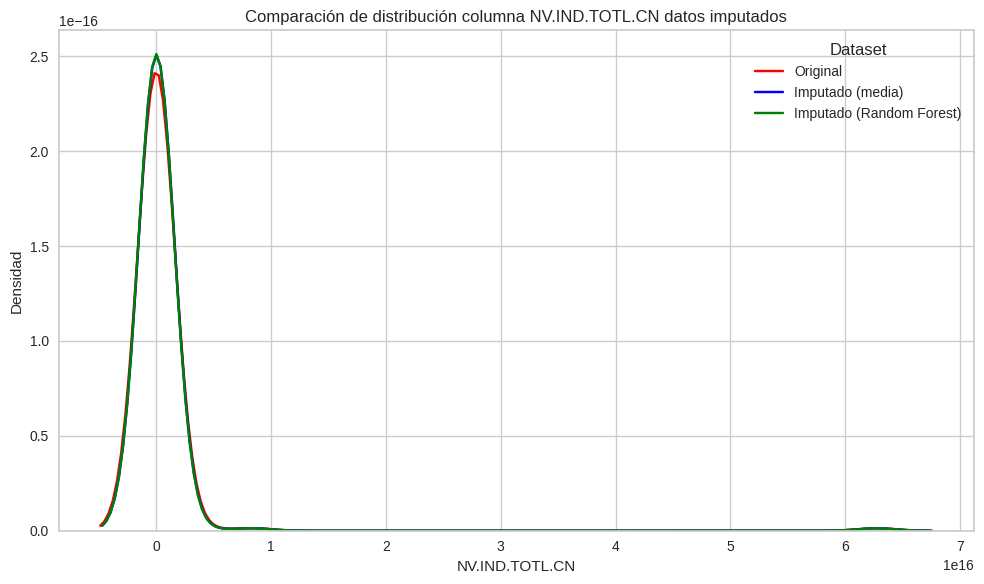

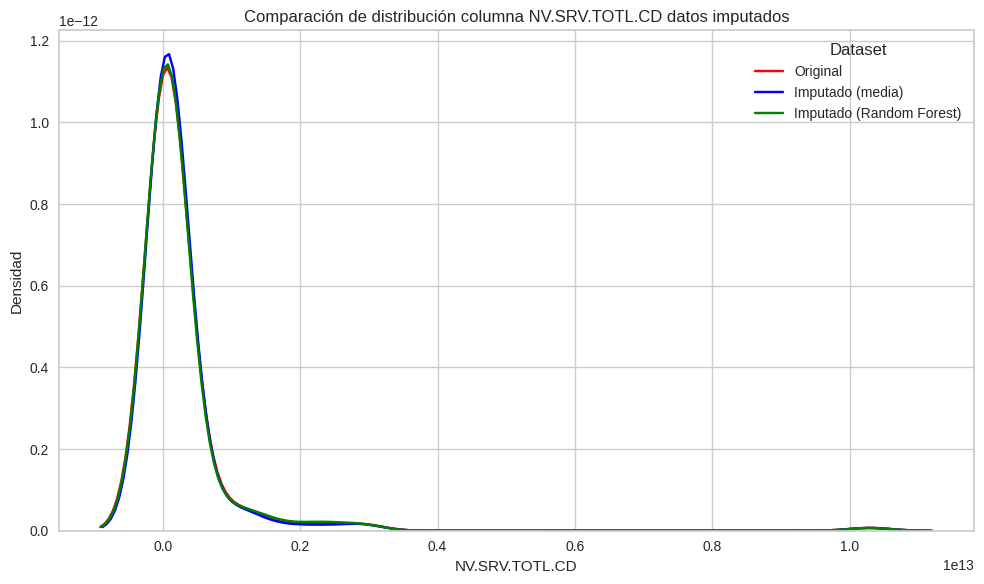

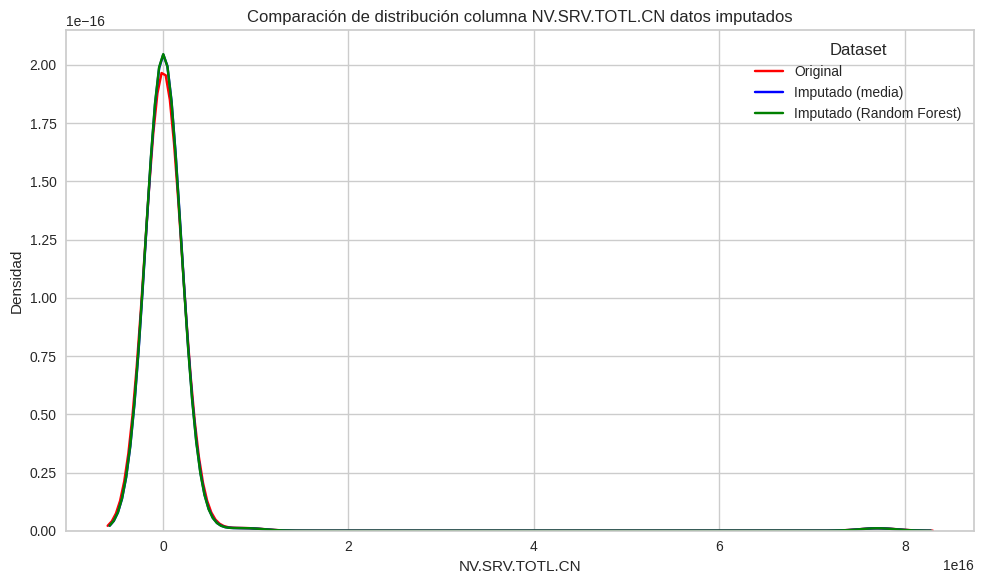

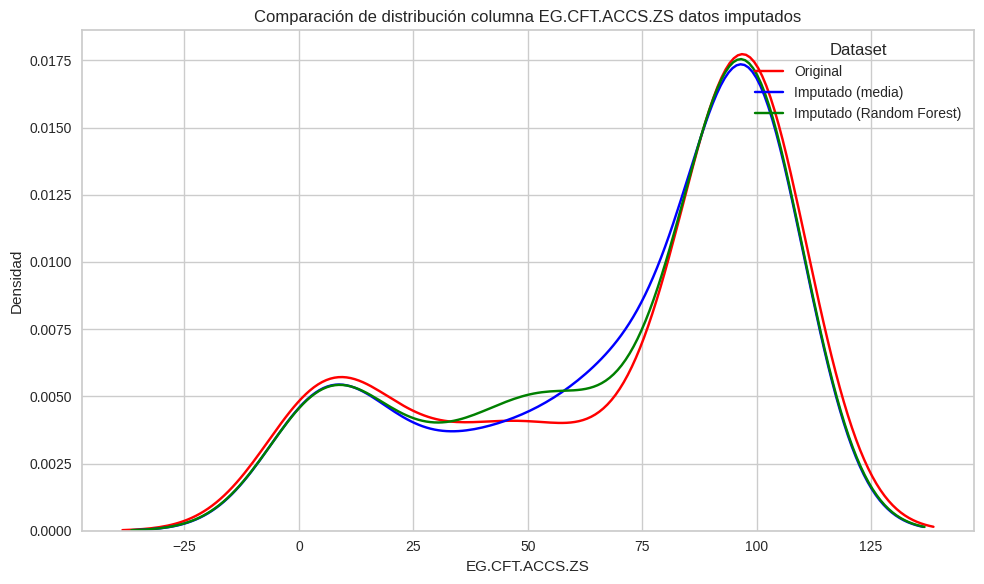

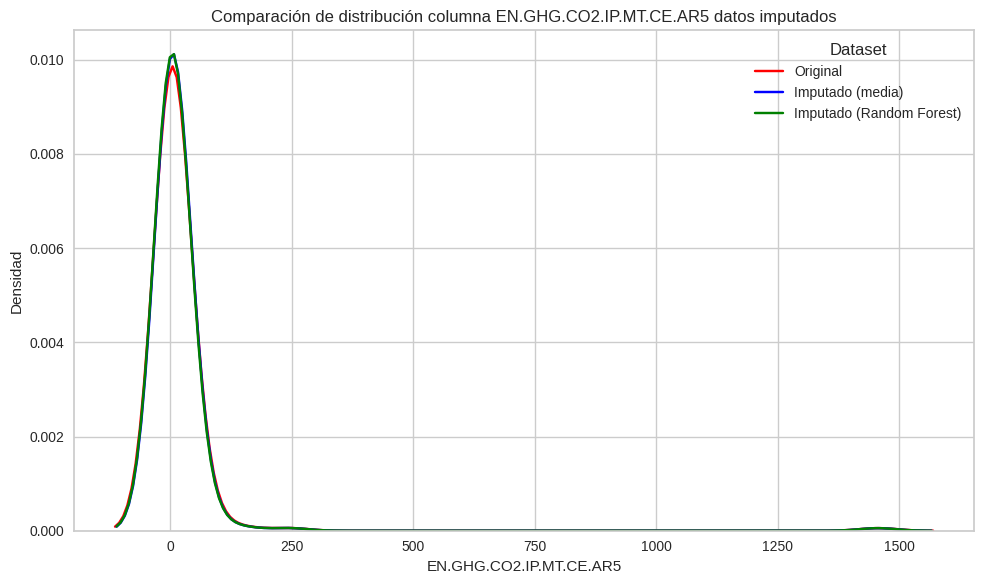

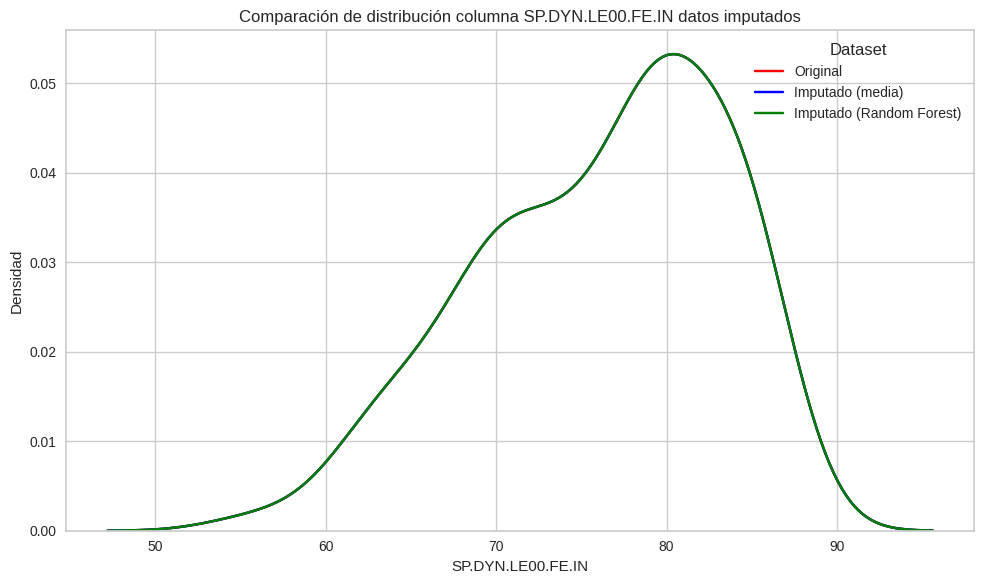

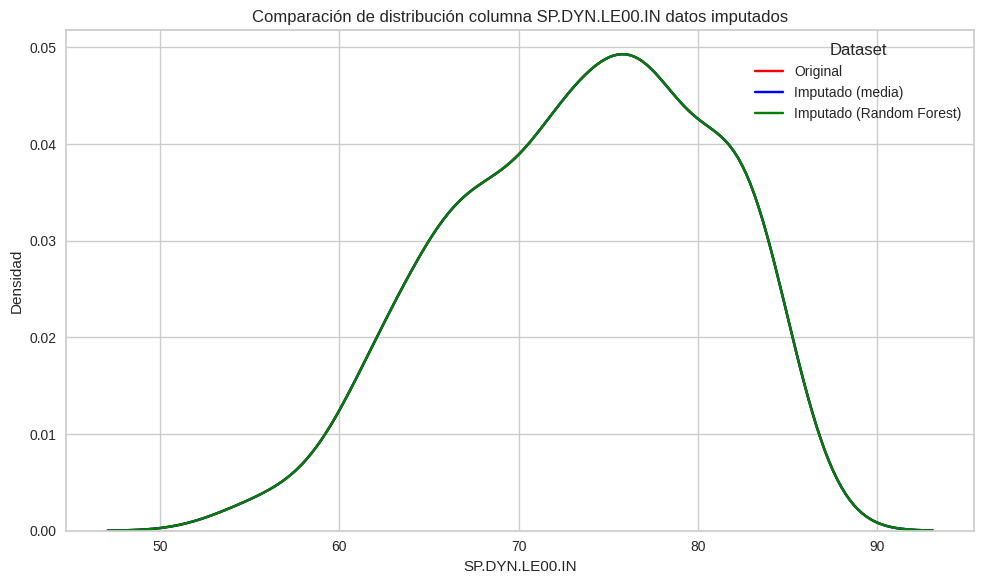

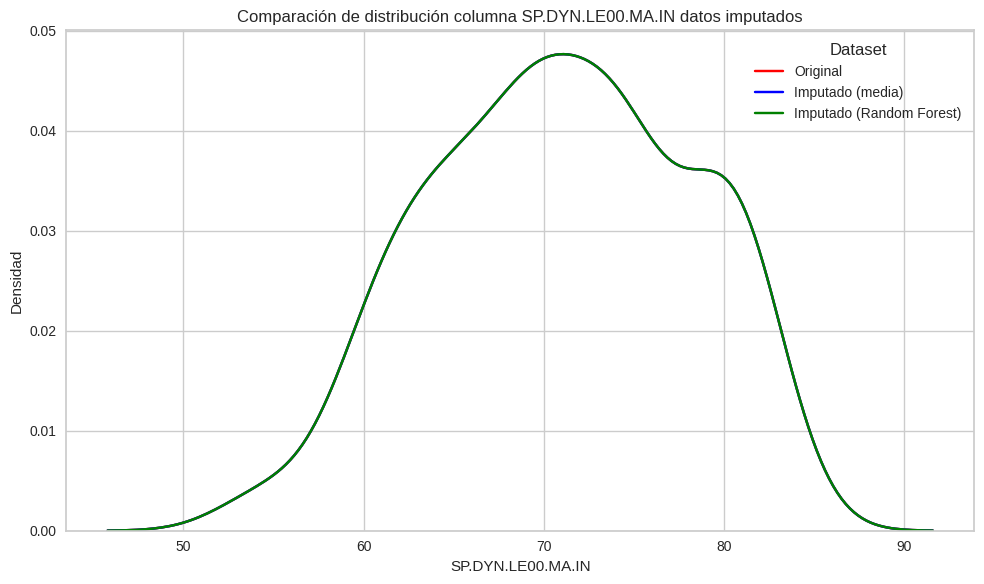

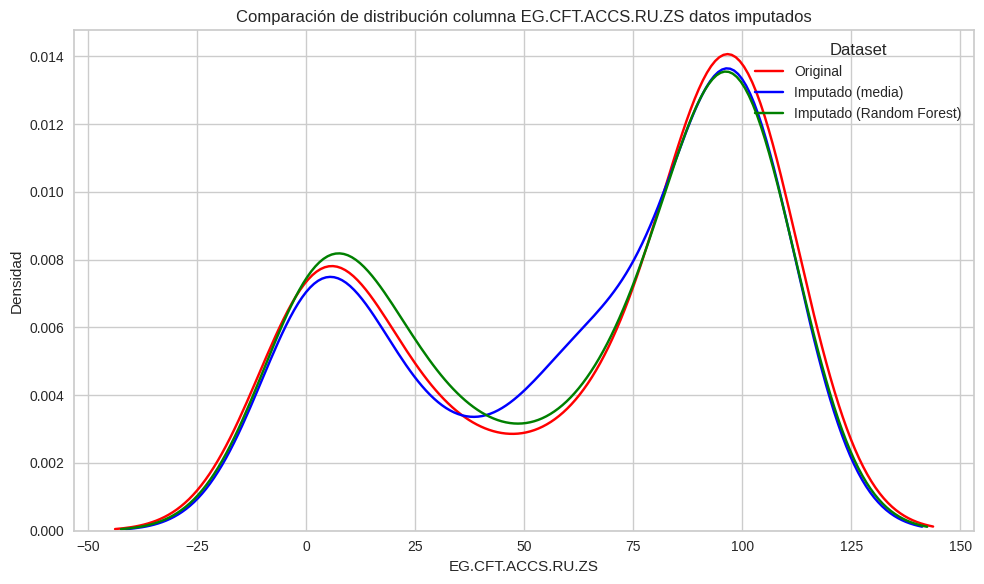

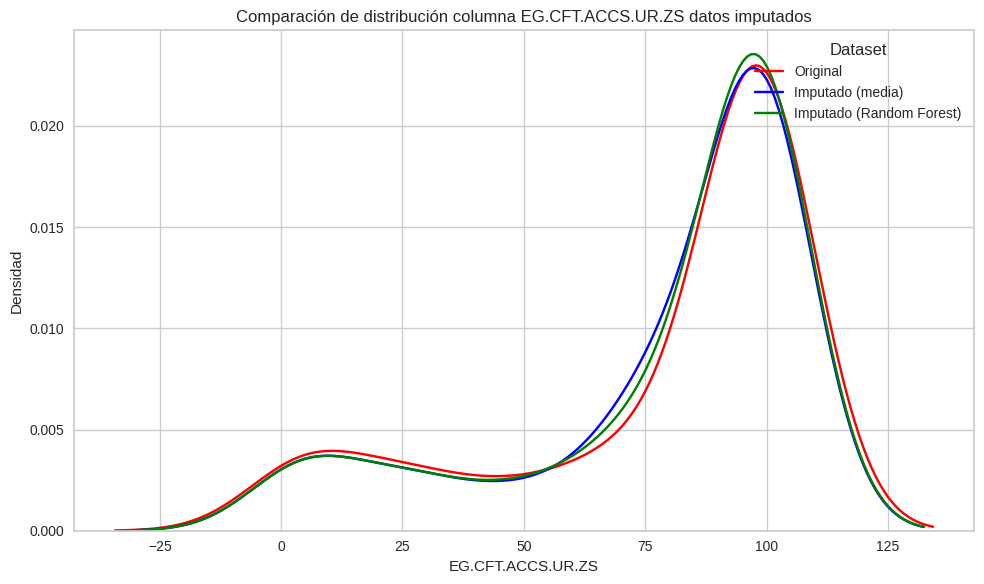

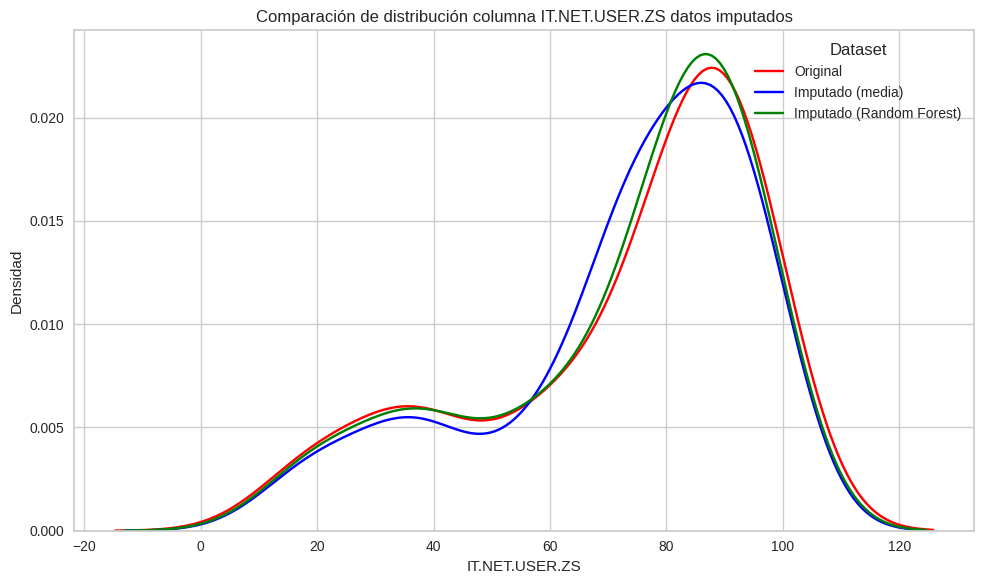

In [267]:
columnas = df_wb_limpio.select_dtypes(include='number').columns

for col in columnas:
  plt.figure(figsize=(10, 6))
  sns.kdeplot(data=df_wb_limpio, x= col, label='Original', color='red')
  sns.kdeplot(data=df_wb_media, x=col, label='Imputado (media)', color='blue')
  sns.kdeplot(data=df_randomf, x=col, label='Imputado (Random Forest)', color='green')

  plt.legend(title='Dataset', loc='upper right')
  plt.title(f"Comparación de distribución columna {col} datos imputados")
  plt.xlabel(col)
  plt.ylabel("Densidad")
  plt.tight_layout()
  plt.show()

Interpretacion: Al comparar las distribuciones, el metodo Random Forest genera valores iputados que se parecen mas a los datos reales. Por eso es mejor y elegimos: Mantiene mejor la forma y tendencia de laas variables y reduce el sesgo que podria introducir una imputacion mas simple como la media.

In [268]:
df_randomf.describe()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
count             198.00             198.00          198.00       198.00   
mean     838871240077.62              42.04     18359859.21         1.15   
std     3129921929150.23               8.52     71666185.38         1.58   
min          57054510.99               6.85        33614.00        -8.42   
25%       25866914321.92              40.13       713129.00         0.28   
50%       85967640784.20              44.56      3175596.50         1.11   
75%      461529149884.58              47.45     10694841.00         2.09   
max    32004884803945.30              54.67    774607590.00         6.53   

        SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
count        198.00             198.00             198.00             198.00   
mean    39996113.09        19877755.27              49.97        20118357.81   
std    148495681.87        72528404.70               2.99        75980559.69   
min         9816.00            4795.00              28.48            5021.00   
25%      1373786.00          687685.00              49.65          682645.00   
50%      7335048.50         3672053.50              50.33         3560819.50   
75%     29364132.25        14032244.50              51.19        14244571.00   
max   1438069596.00       696186332.00              54.92       741883264.00   

       SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  \
count             198.00       198.00          198.00          198.00   
mean               50.03  17099372.07            0.23           37.79   
std                 2.99  76638582.33            1.96           22.72   
min                45.08         0.00           -8.59            0.00   
25%                48.81    413413.50           -0.67           20.45   
50%                49.67   1983891.50            0.41           36.38   
75%                50.35  10242248.50            1.25           56.64   
max                71.52 933771782.00            8.71           84.94   

       SP.URB.GROW  SP.URB.TOTL  SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  \
count       198.00       198.00             198.00          198.00   
mean          1.73  22896741.02              62.21           10.50   
std           1.83  80190575.27              22.72           19.76   
min          -8.35      6283.00              15.06           -4.64   
25%           0.45    854047.75              43.36            3.85   
50%           1.52   4463172.50              63.62            5.94   
75%           2.70  16245599.25              79.55            9.88   
max           8.11 924440306.00             100.00          221.34   

       NE.EXP.GNFS.ZS   NV.AGR.TOTL.CD       NV.AGR.TOTL.CN   NV.IND.MANF.CD  \
count          198.00           198.00               198.00           198.00   
mean            46.08   21448590483.63   114907561988422.97   71683952026.12   
std             32.76  100716027857.94  1250796045129342.25  350028285237.39   
min              1.11        306019.73            282979.50       2264200.00   
25%             24.05     617172806.41        2390774475.00     936600456.58   
50%             39.08    3376338269.45       61266000000.00    4480953494.51   
75%             57.60    9933114263.68     3237671750000.00   32021543051.56   
max            217.38 1258739768136.58 17387879460346100.00 4658788723542.83   

       SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  SL.UEM.TOTL.ZS  \
count             198.00             198.00          198.00   
mean                7.94               6.28            6.78   
std                 6.72               4.86            5.26   
min                 0.25               0.08            0.13   
25%                 3.66               3.31            3.47   
50%                 6.26               5.14            5.58   
75%                 9.39               7.44            8.04   
max                36.70              33.55           35.09   

       BM.KLT.DINV.CD.W

Se elaboró una tabla con estadísticas descriptivas para sintetizar valores como promedio/mediana y la variabilidad de los indicadores, permitiendo describir y entender la base de datos antes de construir los modelos.

ABOD

In [269]:
%pip install pyod

In [270]:
from pyod.models.abod import ABOD


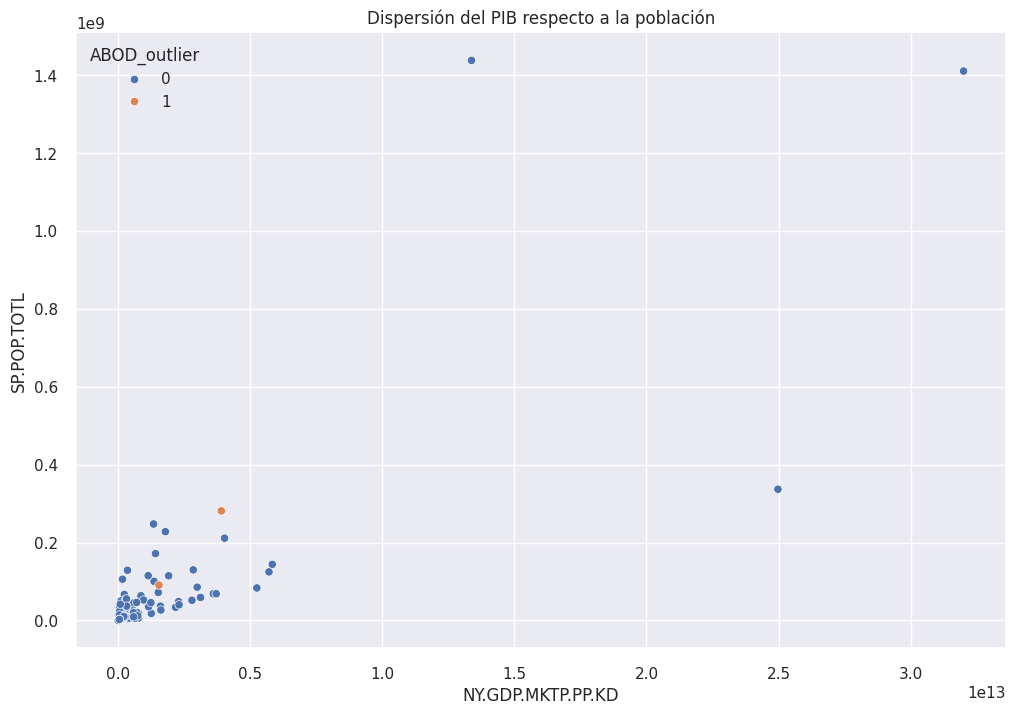

np.int64(2)

In [271]:
abod_clf = ABOD(contamination=0.01)

df_a = df_randomf.copy()

numeric_cols = df_a.select_dtypes(include=np.number).columns
abod_clf.fit(df_a[numeric_cols])

df_a['ABOD_outlier'] = abod_clf.labels_

sns.set(rc = {'figure.figsize':(12,8)})
sns.scatterplot(data=df_a, x='NY.GDP.MKTP.PP.KD', y='SP.POP.TOTL', hue='ABOD_outlier')
plt.title('Dispersión del PIB respecto a la población')
plt.show()

df_a['ABOD_outlier'].sum()

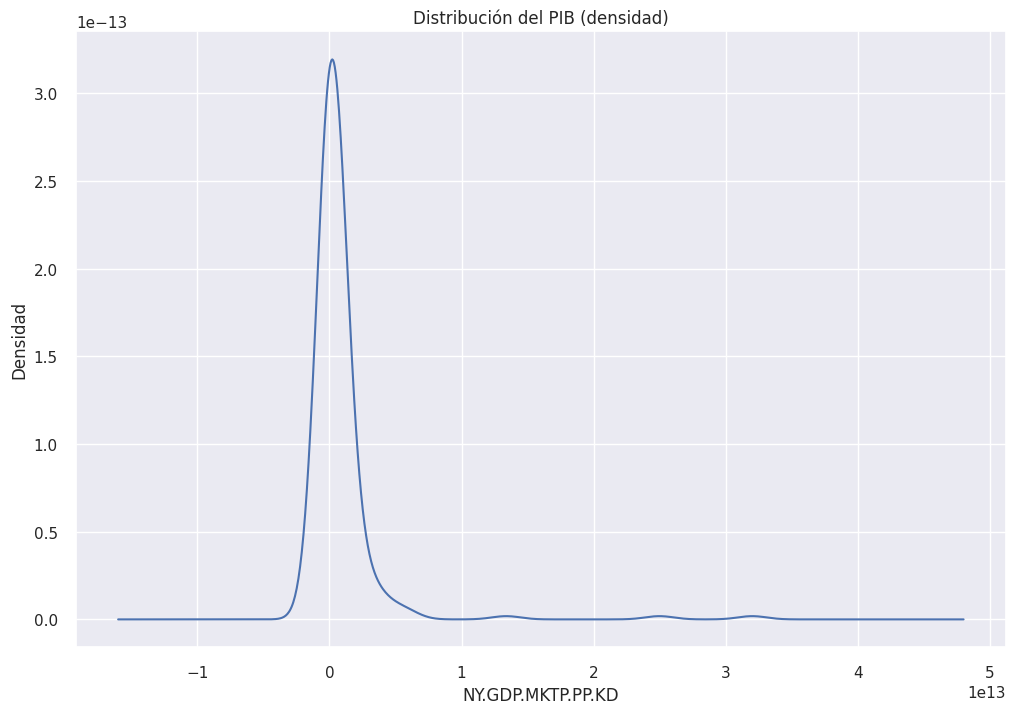

In [272]:
import matplotlib.pyplot as plt

plt.figure()
df_randomf['NY.GDP.MKTP.PP.KD'].plot(kind="density")
plt.xlabel("NY.GDP.MKTP.PP.KD")
plt.ylabel("Densidad")
plt.title("Distribución del PIB (densidad)")
plt.show()


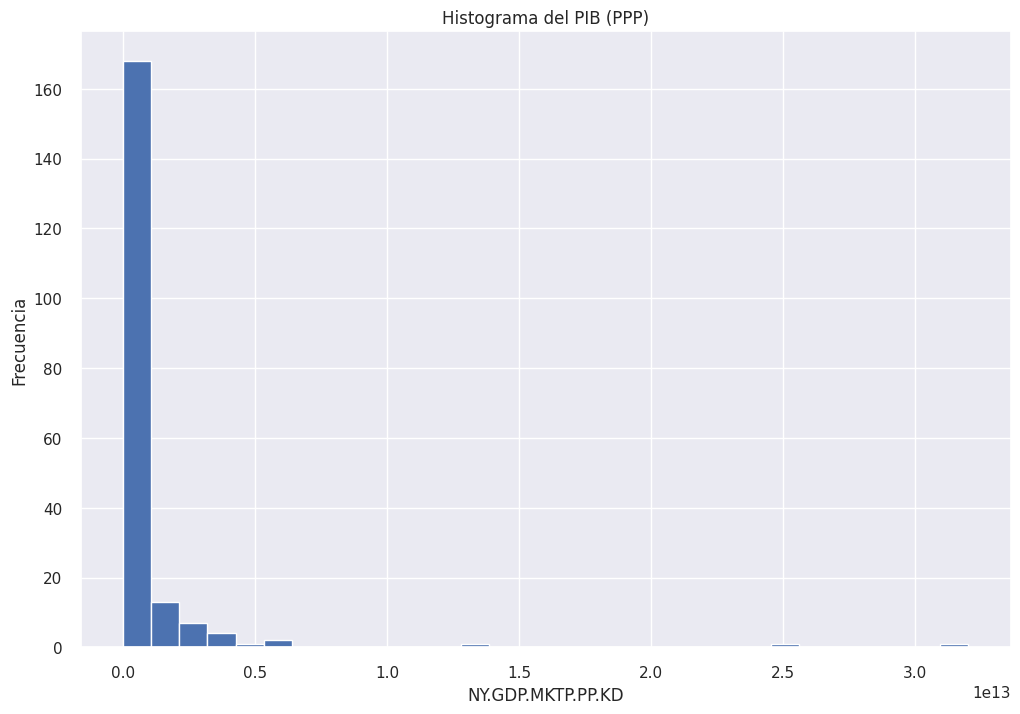

In [273]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_randomf['NY.GDP.MKTP.PP.KD'], bins=30)
plt.xlabel('NY.GDP.MKTP.PP.KD')
plt.ylabel('Frecuencia')
plt.title('Histograma del PIB (PPP)')
plt.show()

Interpretacion: El histograma y la densidad muestran que el PIB está sesgado: la mayor parte de los países se agrupa en valores bajos y solo unos pocos aparecen con PIB muy altos, formando una cola hacia la derecha. Esto demuestra la gran diferencia económica entre países. Además, ambos gráficos coinciden en la misma conclusión.

**Etapa 2**

In [274]:
y = df_randomf['NY.GDP.MKTP.PP.KD']
x = df_randomf.drop(columns='NY.GDP.MKTP.PP.KD')

In [275]:
from sklearn.preprocessing import StandardScaler


In [276]:
#Escalar de datos
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x.columns)

In [277]:
import matplotlib.pyplot as plt


Matriz de correlacion

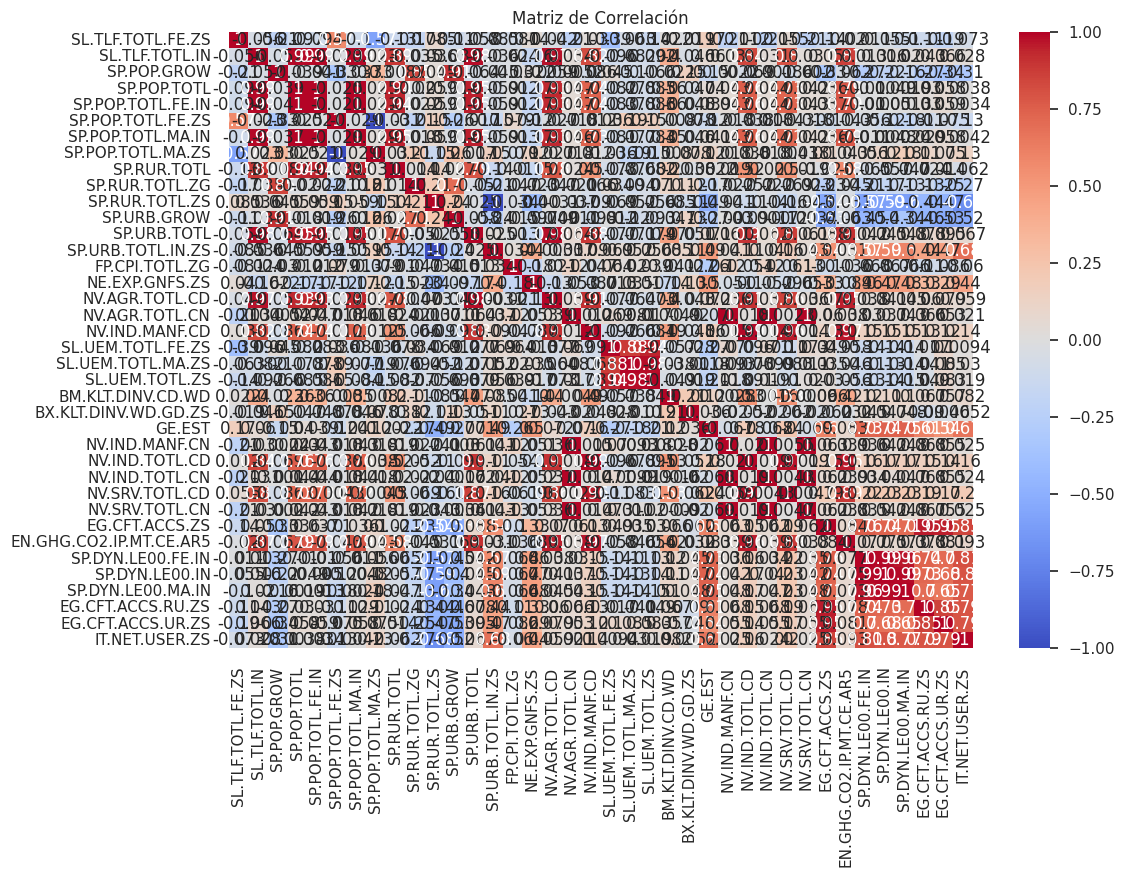

In [278]:
corr = x_std.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [279]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_std)

pca.explained_variance_ratio_



array([2.66298402e-01, 2.09393438e-01, 1.09297570e-01, 9.06184302e-02,
       7.55099481e-02, 4.58031587e-02, 3.49997983e-02, 3.05220156e-02,
       2.82114884e-02, 2.64965719e-02, 1.89798801e-02, 1.52236653e-02,
       1.28596355e-02, 1.15722494e-02, 6.50443327e-03, 4.78964766e-03,
       3.64093475e-03, 3.12690516e-03, 2.11892028e-03, 1.33220951e-03,
       8.44639754e-04, 5.99889989e-04, 5.10733572e-04, 2.21262176e-04,
       1.77434978e-04, 1.43633441e-04, 8.41823589e-05, 6.66459715e-05,
       2.67049157e-05, 1.56699328e-05, 4.35656891e-06, 2.33431939e-06,
       2.18902447e-06, 1.02020608e-06, 6.83731384e-31, 1.31901550e-33,
       1.31901550e-33, 1.29525128e-33])

Se utilizó el PCA sobre las variables previamente estandarizadas. Esta técnica construye nuevas variables independientes entre sí, formadas como combinaciones lineales de las originales, de manera que expliquen la mayor parte posible de la variabilidad de los datos.

In [280]:
np.sum(pca.explained_variance_ratio_[:5])

np.float64(0.7511177890726131)

In [281]:
#seleccionar 5 componentes
pca_2 = PCA(n_components=5)
data_pca = pca_2.fit_transform(x_std)

df_pca = pd.DataFrame(data_pca, columns=['CP1', 'CP2','CP3','CP4','CP5'])
df_pca.head()

CP1   CP2   CP3   CP4   CP5
0 -1.82 -3.64 -0.15 -1.15 -0.17
1 -1.83 -3.76 -0.23  0.85 -0.34
2 -1.23 -1.26  0.04 -0.08  0.65
3  1.23  0.33  1.00  0.28 -2.17
4 -1.65 -2.73 -0.24  0.89 -0.79

Interpretacion: Como varias variables del dataset entregan informacion parecida (están correlacionadas), usamos PCA para “resumir” el dataset en menos variables nuevas que concentran la mayor parte de la información. En este caso, los primeros 5 componentes explican cerca del 75% de la variacion total, lo que permite reducir la cantidad de variables sin perder demasiada informacio y dejando componentes no correlacionados entre sí

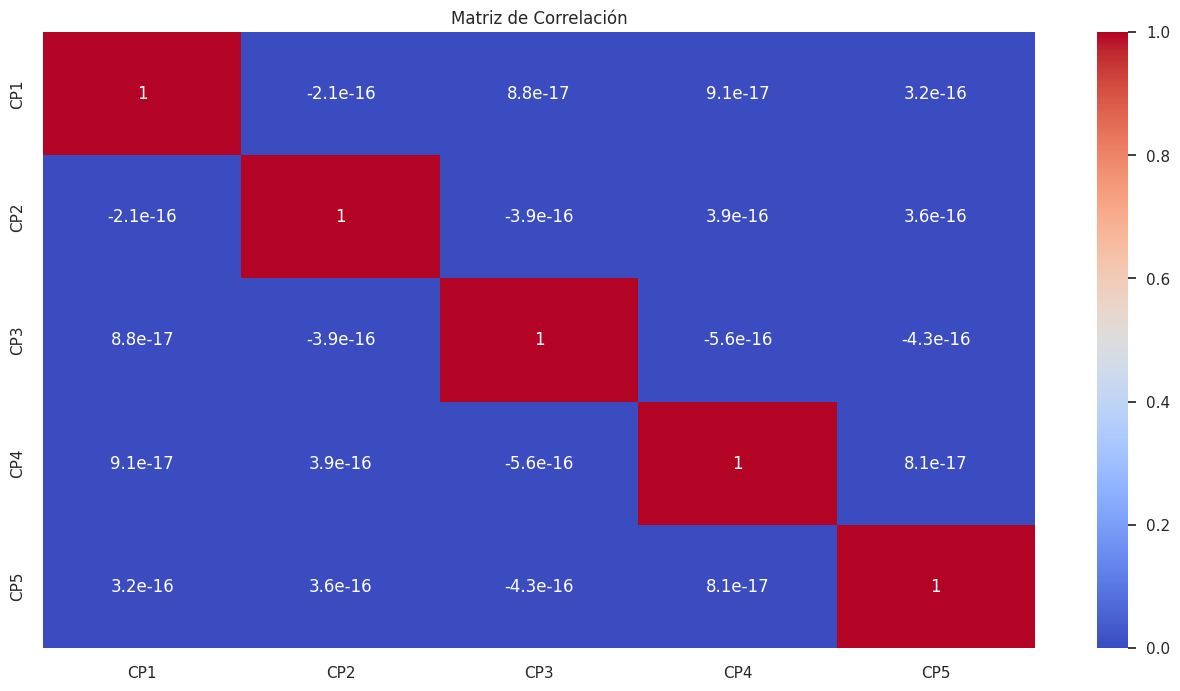

In [282]:
#Matriz de correlación
corr = df_pca.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [283]:
data_pca

array([[-1.81508896e+00, -3.64437998e+00, -1.45694453e-01,
        -1.15471500e+00, -1.65492193e-01],
       [-1.83454832e+00, -3.76242983e+00, -2.30295238e-01,
         8.54099177e-01, -3.43465275e-01],
       [-1.23105451e+00, -1.26356071e+00,  4.31356941e-02,
        -8.20349554e-02,  6.50257346e-01],
       [ 1.23461209e+00,  3.31905355e-01,  1.00130714e+00,
         2.79643969e-01, -2.16505854e+00],
       [-1.64534137e+00, -2.72996867e+00, -2.35013052e-01,
         8.89173475e-01, -7.93581641e-01],
       [-2.07119601e-01, -1.75432158e-01,  2.18149389e-01,
         9.46083012e-01, -4.03158009e-02],
       [ 1.40759595e-01,  2.88476249e+00, -3.09332431e-01,
        -1.40874368e+00, -1.71201718e-01],
       [ 8.19785944e+00,  1.71656493e-01, -5.44415747e-01,
         4.56566037e-01, -4.08355410e-01],
       [ 2.51553208e+00,  2.38293937e+00, -6.85936824e-01,
         4.37346786e-01, -7.76335432e-01],
       [ 8.93420562e-01,  3.55343833e+00,  3.62585517e-01,
         6.97448252e+00

**Etapa final**

In [284]:
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

Modelo de clasificación

In [285]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Escalamiento y clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

# Evaluación de número óptimo de clusters
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Métricas
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV, KFold

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

escalar dataset

In [286]:
escalado = StandardScaler()
data_escalada = escalado.fit_transform(df_randomf)
df_data_escalada = pd.DataFrame(data_escalada, index = df_randomf.index, columns = df_randomf.columns)
df_data_escalada.head()

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
0              -0.24               0.92           -0.17         0.33   
1              -0.24               0.49           -0.16         1.04   
2              -0.26               0.28           -0.22         0.79   
3               0.17               0.77            0.54        -0.31   
4              -0.27               0.48           -0.26         0.75   

   SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
0        -0.16              -0.16               0.81              -0.16   
1        -0.13              -0.13               0.18              -0.13   
2        -0.24              -0.24               0.11              -0.23   
3         0.41               0.43               0.35               0.38   
4        -0.27              -0.27              -0.16              -0.26   

   SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  \
0              -0.81        -0.09            0.25            1.01   
1              -0.18        -0.07            0.91            0.76   
2              -0.11        -0.21            0.10           -1.09   
3              -0.35         0.59           -0.25            1.06   
4               0.16        -0.22            1.06            1.76   

   SP.URB.GROW  SP.URB.TOTL  SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  \
0         0.80        -0.21              -1.01           -0.14   
1         1.11        -0.17              -0.76            0.02   
2         0.53        -0.23               1.09           -0.23   
3         0.26         0.19              -1.06           -0.37   
4         0.35        -0.29              -1.76            0.03   

   NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD  NV.AGR.TOTL.CN  NV.IND.MANF.CD  \
0           -0.89           -0.17           -0.09           -0.19   
1           -0.16           -0.21           -0.09           -0.20   
2           -0.87           -0.20           -0.09           -0.20   
3            1.24            0.30            0.89            0.10   
4           -0.54           -0.21           -0.04           -0.20   

   SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  SL.UEM.TOTL.ZS  BM.KLT.DINV.CD.WD  \
0               0.13               0.50            0.38              -0.11   
1              -0.26              -0.13           -0.17              -0.11   
2               0.09               0.08            0.17              -0.11   
3              -0.96              -0.93           -0.98              -0.15   
4              -0.23              -0.47           -0.32              -0.11   

   BX.KLT.DINV.WD.GD.ZS  GE.EST  NV.IND.MANF.CN  NV.IND.TOTL.CD  \
0                 -0.15   -1.23           -0.09           -0.22   
1                 -0.10   -0.69           -0.09           -0.22   
2                 -0.23   -1.27           -0.09           -0.24   
3                  0.05    0.14            0.91            0.07   
4                 -0.21   -0.59           -0.08           -0.24   

   NV.IND.TOTL.CN  NV.SRV.TOTL.CD  NV.SRV.TOTL.CN  EG.CFT.ACCS.ZS  \
0           -0.09           -0.27           -0.09           -1.12   
1           -0.09           -0.27           -0.09           -1.73   
2           -0.09           -0.28           -0.09           -0.55   
3            0.77           -0.08            0.70            0.82   
4           -0.07           -0.29           -0.07           -1.41   

   EN.GHG.CO2.IP.MT.CE.AR5  SP.DYN.LE00.FE.IN  SP.DYN.LE00.IN  \
0                    -0.14              -1.54           -1.51   
1                    -0.14              -1.03           -1.01   
2                    -0.15              -0.64           -1.18   
3                     0.32               0.44            0.16   
4                    -0.15              -0.30           -0.28   

   SP.DYN.LE00.MA.IN  EG.CFT.ACCS.RU.ZS  EG.CFT.ACCS.UR.ZS  IT.NET.USER.ZS  
0              -1.51              -1.31              -0.06           -1.43  
1              -0.98              -1.44              -2.00  

In [287]:
#min max
from sklearn.preprocessing import MinMaxScaler
escalado = MinMaxScaler()
data_min_max = escalado.fit_transform(df_randomf)
data_min_max = pd.DataFrame(data_min_max, index = df_randomf.index, columns = df_randomf.columns)

In [288]:
#modelos KMeans inicando k grupos
kmeans = KMeans(n_clusters = 3,
                random_state = 0,
                n_init='auto')

#Entrenar datos escalados
kmeans.fit(data_escalada)

KMeans(n_clusters=3, random_state=0)

In [289]:
#cluster
cluster = kmeans.labels_
cluster

array([2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2],
      dtype=int32)

In [290]:
df_kmeans = df_randomf.copy()
df_kmeans['cluster'] = cluster

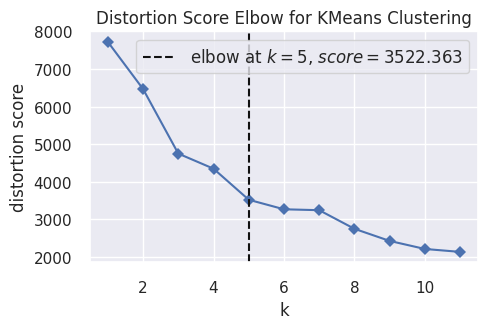

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [291]:
df_knn_op = df_data_escalada.copy()

# Instanciar modelo de agrupamiento
model = KMeans()

plt.figure(figsize=(5,3))

# Obtener métricas de acuerdo a k
visualizer = KElbowVisualizer(model, k=(1,12),
                              metric='distortion',
                              timings=False)

visualizer.fit(df_knn_op)
visualizer.show()

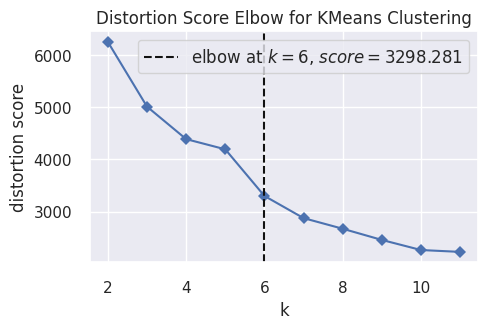

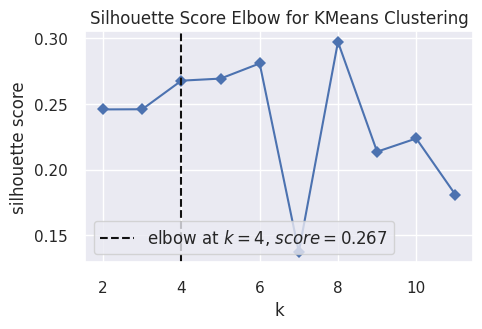

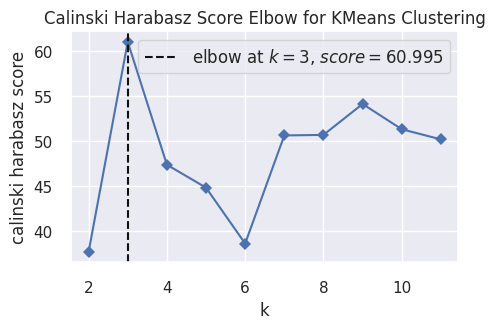

In [292]:
# Metricas de evaluación
metricas = ['distortion','silhouette','calinski_harabasz']

# Selección k óptimo
for metrica in metricas:


  plt.figure(figsize=(5, 3))
  # Obtener métricas de acuerdo a k
  visualizer = KElbowVisualizer(model, k=(2,12),
                                metric=metrica,
                                timings=False)

  visualizer.fit(df_knn_op)
  visualizer.show();

In [293]:
X = data_escalada

param_grid = {
    'n_clusters': [2,3,4,5,6],
    'init': ['k-means++', 'random'],
    'n_init': [10,20,30,40]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

def silhouette_scorer_func(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

grid_search = GridSearchCV(
    estimator=KMeans(),
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer_func),
    cv=kf,
    verbose=1
)

grid_search.fit(X)

best_params = grid_search.best_params_
best_kmeans = grid_search.best_estimator_

print("Mejores hiperparámetros:", best_params)
print("Silhouette Score asociado:", silhouette_score(X, best_kmeans.labels_))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Mejores hiperparámetros: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Silhouette Score asociado: 0.7817365211649812


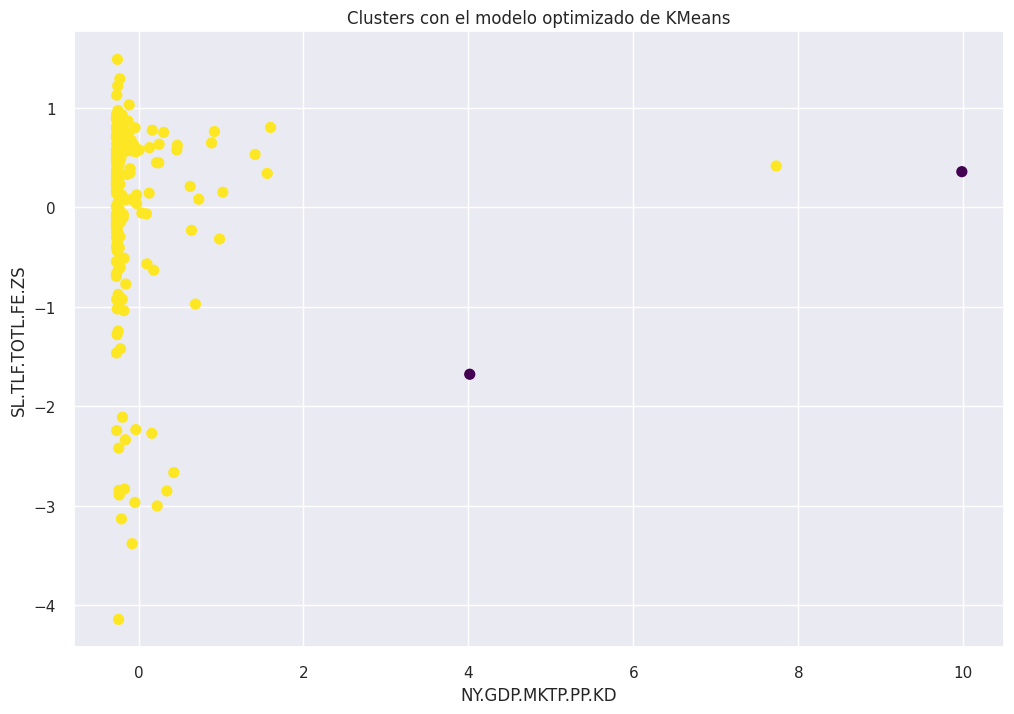

In [294]:
labels = best_kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Clusters con el modelo optimizado de KMeans")
plt.xlabel(df_data_escalada.columns[0])
plt.ylabel(df_data_escalada.columns[1])
plt.show()

confirmamos valores

In [295]:
df_data_escalada['cluster'] = labels
df_data_escalada

NY.GDP.MKTP.PP.KD  SL.TLF.TOTL.FE.ZS  SL.TLF.TOTL.IN  SP.POP.GROW  \
0                -0.24               0.92           -0.17         0.33   
1                -0.24               0.49           -0.16         1.04   
2                -0.26               0.28           -0.22         0.79   
3                 0.17               0.77            0.54        -0.31   
4                -0.27               0.48           -0.26         0.75   
..                 ...                ...             ...          ...   
193              -0.17               0.87           -0.04         1.23   
194              -0.27               0.01           -0.26         0.18   
195              -0.04              -2.97           -0.07         0.22   
196              -0.25               0.35           -0.24        -1.71   
197              -0.24              -4.14           -0.13         0.63   

     SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  SP.POP.TOTL.MA.IN  \
0          -0.16              -0.16               0.81              -0.16   
1          -0.13              -0.13               0.18              -0.13   
2          -0.24              -0.24               0.11              -0.23   
3           0.41               0.43               0.35               0.38   
4          -0.27              -0.27              -0.16              -0.26   
..           ...                ...                ...                ...   
193        -0.02              -0.02               0.19              -0.03   
194        -0.27              -0.27              -0.37              -0.26   
195         0.04               0.04              -0.33               0.05   
196        -0.25              -0.26               0.20              -0.25   
197         0.01               0.01              -0.15               0.01   

     SP.POP.TOTL.MA.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  SP.RUR.TOTL.ZS  \
0                -0.81        -0.09            0.25            1.01   
1                -0.18        -0.07            0.91            0.76   
2                -0.11        -0.21            0.10           -1.09   
3                -0.35         0.59           -0.25            1.06   
4                 0.16        -0.22            1.06            1.76   
..                 ...          ...             ...             ...   
193              -0.19        -0.08            0.12           -0.34   
194               0.37        -0.22            0.32           -1.17   
195               0.33        -0.07           -0.46           -0.55   
196              -0.20        -0.21           -1.33            0.18   
197               0.15         0.18            0.92            1.62   

     SP.URB.GROW  SP.URB.TOTL  SP.URB.TOTL.IN.ZS  FP.CPI.TOTL.ZG  \
0           0.80        -0.21              -1.01           -0.14   
1           1.11        -0.17              -0.76            0.02   
2           0.53        -0.23               1.09           -0.23   
3           0.26         0.19              -1.06           -0.37   
4           0.35        -0.29              -1.76            0.03   
..           ...          ...                ...             ...   
193         1.37         0.03               0.34            0.16   
194        -0.12        -0.29               1.17           -0.18   
195         0.28         0.15               0.55           -0.06   
196        -1.47        -0.27              -0.18           -0.29   
197         0.39        -0.15              -1.62           -0.77   

     NE.EXP.GNFS.ZS  NV.AGR.TOTL.CD  NV.AGR.TOTL.CN  NV.IND.MANF.CD  \
0             -0.89           -0.17           -0.09           -0.19   
1             -0.16           -0.21           -0.09           -0.20   
2             -0.87           -0.20           -0.09           -0.20   
3              1.24            0.30            0.89            0.10   
4             -0.54           -0.21           -0.04           -0.20   
..              ...             ...             ...             ...   
193           -0.42     

**Modelo de clasificación no supervisado base de datos**

In [296]:
data_pca

array([[-1.81508896e+00, -3.64437998e+00, -1.45694453e-01,
        -1.15471500e+00, -1.65492193e-01],
       [-1.83454832e+00, -3.76242983e+00, -2.30295238e-01,
         8.54099177e-01, -3.43465275e-01],
       [-1.23105451e+00, -1.26356071e+00,  4.31356941e-02,
        -8.20349554e-02,  6.50257346e-01],
       [ 1.23461209e+00,  3.31905355e-01,  1.00130714e+00,
         2.79643969e-01, -2.16505854e+00],
       [-1.64534137e+00, -2.72996867e+00, -2.35013052e-01,
         8.89173475e-01, -7.93581641e-01],
       [-2.07119601e-01, -1.75432158e-01,  2.18149389e-01,
         9.46083012e-01, -4.03158009e-02],
       [ 1.40759595e-01,  2.88476249e+00, -3.09332431e-01,
        -1.40874368e+00, -1.71201718e-01],
       [ 8.19785944e+00,  1.71656493e-01, -5.44415747e-01,
         4.56566037e-01, -4.08355410e-01],
       [ 2.51553208e+00,  2.38293937e+00, -6.85936824e-01,
         4.37346786e-01, -7.76335432e-01],
       [ 8.93420562e-01,  3.55343833e+00,  3.62585517e-01,
         6.97448252e+00

In [297]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

escalado = StandardScaler()
data_escalada = escalado.fit_transform(data_pca)

df_data_escalada = pd.DataFrame(data_escalada)
df_data_escalada.head()


0     1     2     3     4
0 -0.57 -1.29 -0.07 -0.62 -0.10
1 -0.58 -1.33 -0.11  0.46 -0.20
2 -0.39 -0.45  0.02 -0.04  0.38
3  0.39  0.12  0.49  0.15 -1.28
4 -0.52 -0.97 -0.12  0.48 -0.47

In [298]:
kmeans = KMeans(n_clusters = 3,
                random_state = 0,
                n_init='auto')

#Entrenar datos escalados
kmeans.fit(data_escalada)

KMeans(n_clusters=3, random_state=0)

In [299]:
cluster = kmeans.labels_
cluster

array([2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0,
       2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int32)

In [300]:
df_kmeans = df_randomf.copy()
df_kmeans['cluster'] = cluster

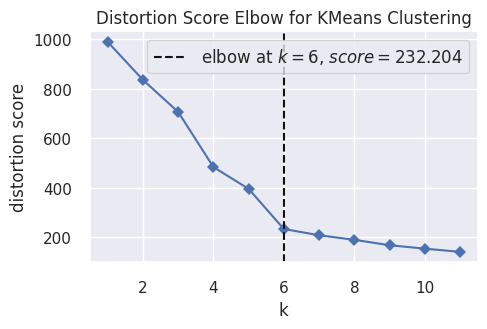

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [301]:
df_knn_op = df_data_escalada.copy()

# Instanciar modelo de agrupamiento
model = KMeans()

plt.figure(figsize=(5,3))

# Obtener métricas de acuerdo a k
visualizer = KElbowVisualizer(model, k=(1,12),
                              metric='distortion',
                              timings=False)

visualizer.fit(df_knn_op)
visualizer.show()


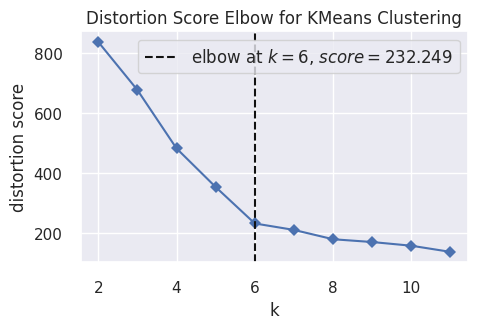

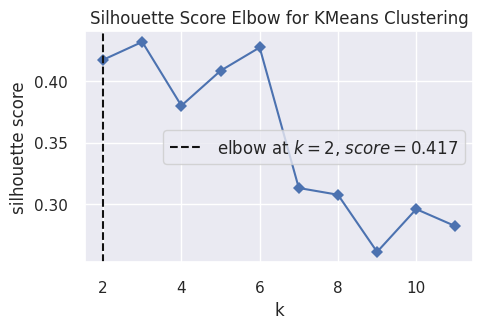

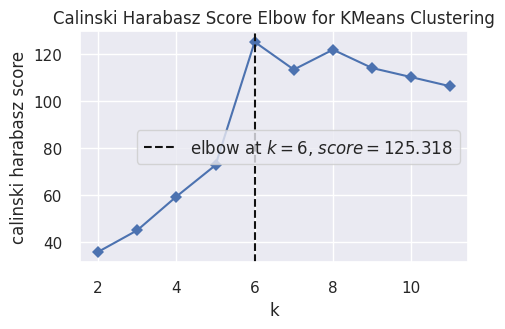

In [302]:
metricas = ['distortion','silhouette','calinski_harabasz']

# Selección k óptimo
for metrica in metricas:
  # Instanciar modelo de agrupamiento

  plt.figure(figsize=(5, 3))
  # Obtener métricas de acuerdo a k
  visualizer = KElbowVisualizer(model, k=(2,12),
                                metric=metrica,
                                timings=False)

  visualizer.fit(df_knn_op)
  visualizer.show();

In [303]:
X = data_escalada

param_grid = {
    'n_clusters': [2,3,4,5,6],
    'init': ['k-means++', 'random'],
    'n_init': [10,20,30,40]
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

def silhouette_scorer_func(estimator, X):
    labels_temp = estimator.fit_predict(X) # Use a temporary variable for labels within the function
    return silhouette_score(X, labels_temp)

grid_search = GridSearchCV(
    estimator=KMeans(),
    param_grid=param_grid,
    scoring=make_scorer(silhouette_scorer_func),
    cv=kf,
    verbose=1
)

grid_search.fit(X)

best_params = grid_search.best_params_
best_kmeans = grid_search.best_estimator_

# Rename labels to avoid conflict
pca_cluster_labels = best_kmeans.predict(X)

print("Mejores hiperparámetros:", best_params)
print("Silhouette Score asociado:", silhouette_score(X, pca_cluster_labels))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Mejores hiperparámetros: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Silhouette Score asociado: 0.8281168466255626


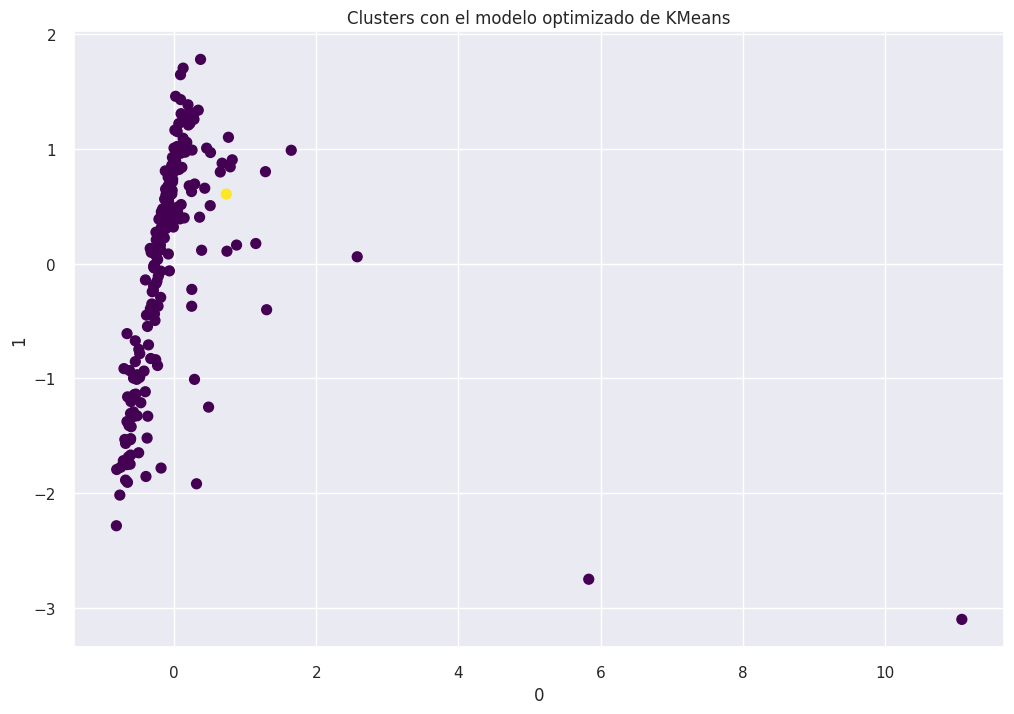

In [304]:
plt.scatter(X[:, 0], X[:, 1], c=pca_cluster_labels, cmap='viridis', s=50)
plt.title("Clusters con el modelo optimizado de KMeans")
plt.xlabel(df_data_escalada.columns[0])
plt.ylabel(df_data_escalada.columns[1])
plt.show()

In [305]:
df_data_escalada['cluster'] = pca_cluster_labels
df_data_escalada

0     1     2     3     4  cluster
0   -0.57 -1.29 -0.07 -0.62 -0.10        0
1   -0.58 -1.33 -0.11  0.46 -0.20        0
2   -0.39 -0.45  0.02 -0.04  0.38        0
3    0.39  0.12  0.49  0.15 -1.28        0
4   -0.52 -0.97 -0.12  0.48 -0.47        0
..    ...   ...   ...   ...   ...      ...
193 -0.42 -0.94  0.15 -0.52  1.24        0
194  0.09  1.43 -0.19  0.65  0.26        0
195  0.08  0.39  0.47 -0.14  1.77        0
196 -0.05  0.72 -0.13 -1.13 -0.14        0
197 -0.52 -1.33  0.68 -0.31  2.31        0

[198 rows x 6 columns]

**Modelo de clasificación supervisado base de datos SIN PCA**

In [306]:
df1=df_randomf.copy()
df1['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_randomf['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
y = df1['NY.GDP.MKTP.PP.KD']
X = df1.drop(columns='NY.GDP.MKTP.PP.KD')


In [307]:
from sklearn.model_selection import train_test_split


In [308]:
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [309]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

Algoritmo de clasificacion RFC

In [310]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)

In [311]:
y_pred_rfc = classifier.predict(X_test)

Matriz de confusion

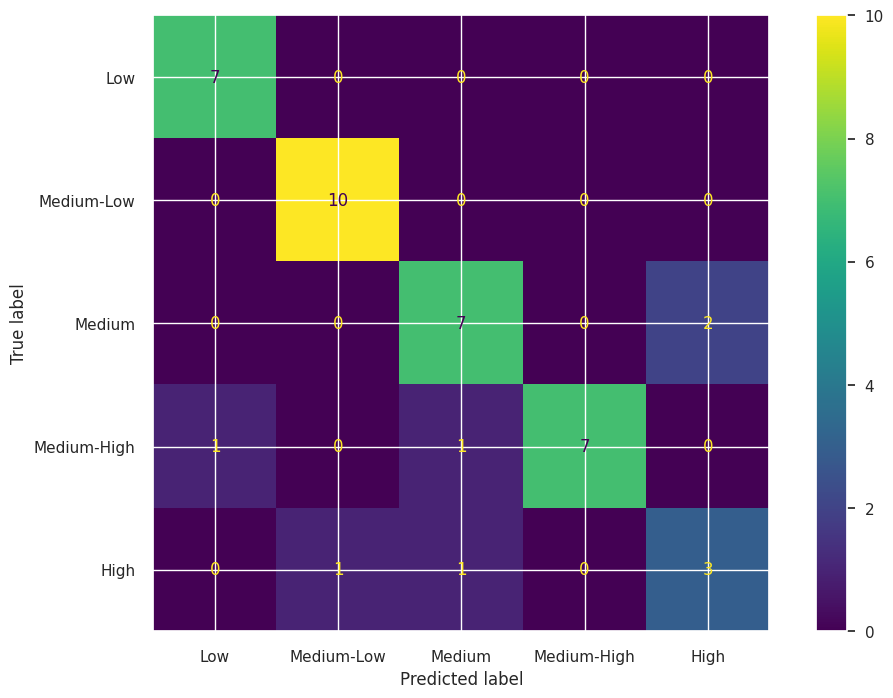

In [312]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)

labels = sorted(y_test.unique())  # tus 5 categorías (Low, Medium-Low, etc.)

ConfusionMatrixDisplay(cm,display_labels=y_test.cat.categories).plot()
plt.show()


In [313]:
from sklearn.metrics import classification_report
import pandas as pd

reporte_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)
reporte_rfc = pd.DataFrame(reporte_rfc).transpose()
reporte_rfc


precision  recall  f1-score  support
High               0.88    1.00      0.93     7.00
Low                0.91    1.00      0.95    10.00
Medium             0.78    0.78      0.78     9.00
Medium-High        1.00    0.78      0.88     9.00
Medium-Low         0.60    0.60      0.60     5.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.83    0.83      0.83    40.00
weighted avg       0.86    0.85      0.85    40.00

**Modelo de clasificación supervisado base de datos PCA**

In [314]:
y = df1['NY.GDP.MKTP.PP.KD']
X = data_pca

In [315]:
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [316]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [317]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)

classifier = rfc_clf.fit(X_train, y_train)

In [318]:
y_pred_rfc = classifier.predict(X_test)

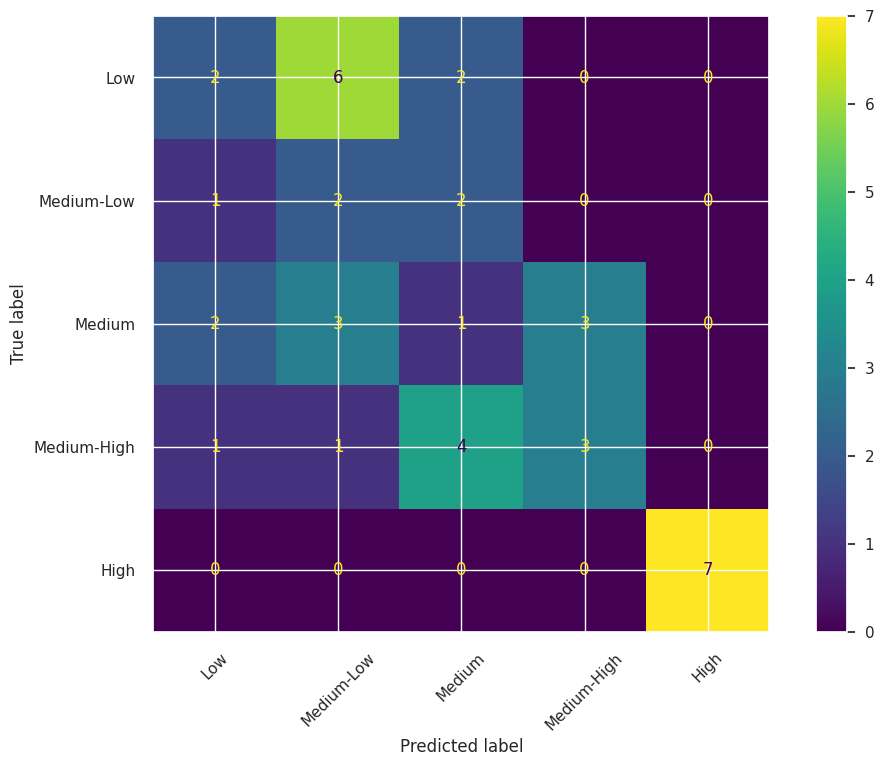

In [319]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = y_test.cat.categories

cm = confusion_matrix(y_test, y_pred_rfc, labels=labels)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(xticks_rotation=45)
plt.show()


In [320]:
reporte_pca = classification_report(y_test, y_pred_rfc, output_dict=True)
reporte_pca = pd.DataFrame(reporte_pca).transpose()
reporte_pca


precision  recall  f1-score  support
High               1.00    1.00      1.00     7.00
Low                0.33    0.20      0.25    10.00
Medium             0.11    0.11      0.11     9.00
Medium-High        0.50    0.33      0.40     9.00
Medium-Low         0.17    0.40      0.24     5.00
accuracy           0.38    0.38      0.38     0.38
macro avg          0.42    0.41      0.40    40.00
weighted avg       0.42    0.38      0.38    40.00

In [321]:
print("Reporte Supervisado Antiguo")
print(reporte_rfc)
print("-----------------------------------------------------")
print("Reporte Supervisado PCA")
print(reporte_pca)


Reporte Supervisado Antiguo
              precision  recall  f1-score  support
High               0.88    1.00      0.93     7.00
Low                0.91    1.00      0.95    10.00
Medium             0.78    0.78      0.78     9.00
Medium-High        1.00    0.78      0.88     9.00
Medium-Low         0.60    0.60      0.60     5.00
accuracy           0.85    0.85      0.85     0.85
macro avg          0.83    0.83      0.83    40.00
weighted avg       0.86    0.85      0.85    40.00
-----------------------------------------------------
Reporte Supervisado PCA
              precision  recall  f1-score  support
High               1.00    1.00      1.00     7.00
Low                0.33    0.20      0.25    10.00
Medium             0.11    0.11      0.11     9.00
Medium-High        0.50    0.33      0.40     9.00
Medium-Low         0.17    0.40      0.24     5.00
accuracy           0.38    0.38      0.38     0.38
macro avg          0.42    0.41      0.40    40.00
weighted avg       0.42    